In [776]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [777]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [778]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


In [779]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
# remove every fixation that has position x or y lower than 0
FixData=FixData[FixData['fix_x']>0]
FixData=FixData[FixData['fix_y']>0]
print(np.shape(FixData))

(257808, 12)


dataset size:  (257808, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  return


Data for  200 observers and  36  stimuli.
Mean fixation number:  36.78  +/-  9.92
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  477.2  +/-  93.0  pixels
Mean Y location:  465.6  +/-  64.8  pixels
Mean saccade  amplitude:  78.6  +/-  18.6  pixels
Mean scanpath  length:  2427.3  +/-  529.8  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.78  +/-  9.92
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  477.2  +/-  93.0  pixels
Mean Y location:  465.6  +/-  64.8  pixels
Mean saccade  amplitude:  78.6  +/-  18.6  pixels
Mean scanpath  length:  2427.3  +/-  529.8  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

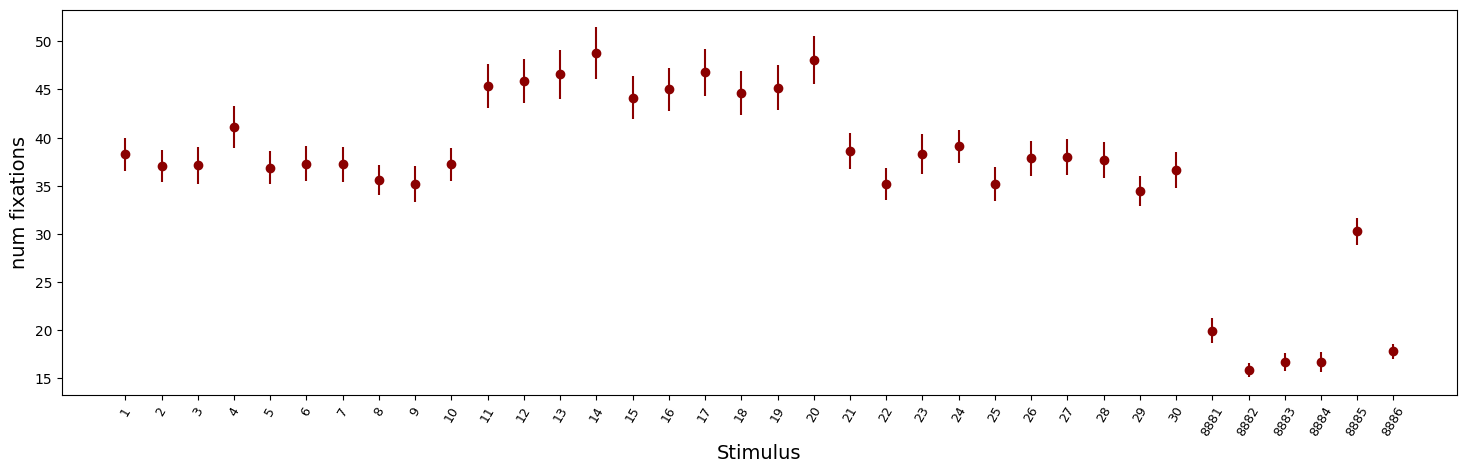

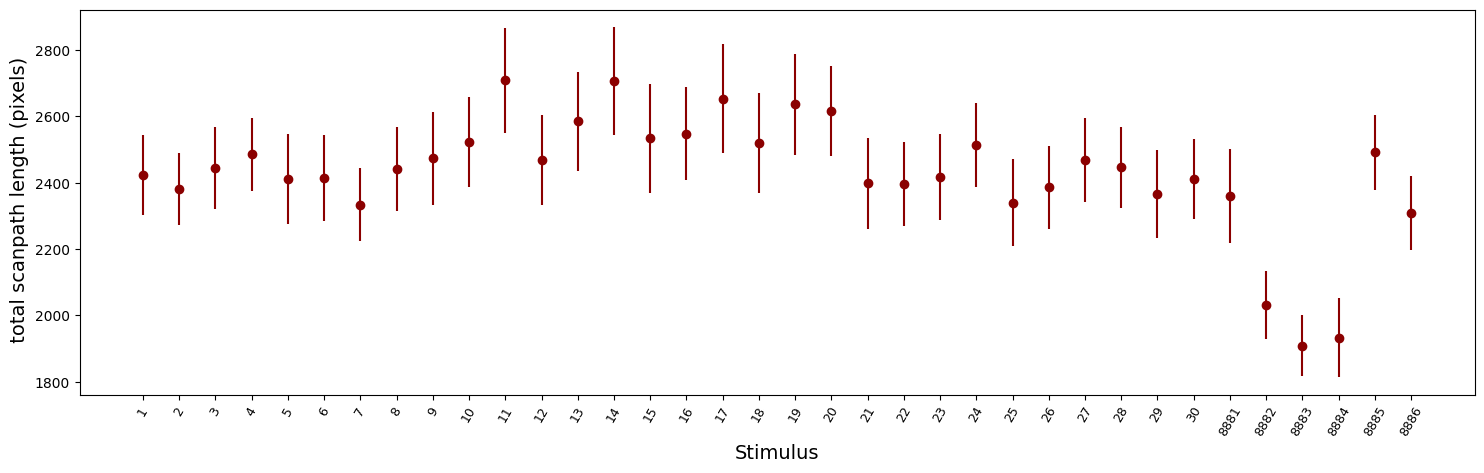

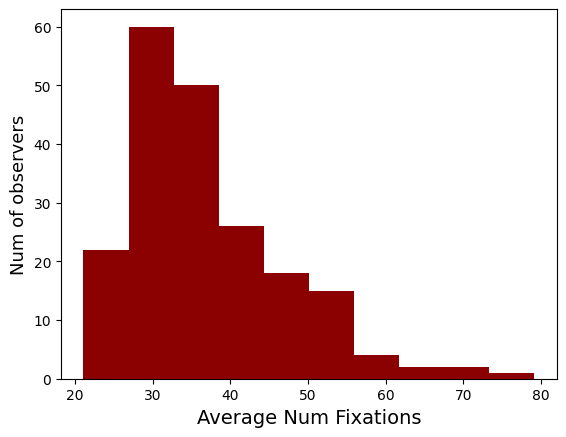

In [780]:

sizeX,sizeY=1280, 960


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [781]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
map_stim_subj = {}
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[117:,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[117+x] = +1
            map_stim_subj[i] = map_stim_subj.get(i, []) + [DyslexiaDat.subjects[117+x]]
            set_subj.add(117+x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

3 Stimuli with complete data: [7, 32, 33]
33 Stimuli with Missing data: {0: 1, 1: 3, 2: 3, 3: 1, 4: 4, 5: 3, 6: 4, 8: 1, 9: 7, 10: 6, 11: 7, 12: 3, 13: 2, 14: 4, 15: 4, 16: 6, 17: 3, 18: 3, 19: 4, 20: 4, 21: 2, 22: 7, 23: 4, 24: 4, 25: 3, 26: 2, 27: 5, 28: 5, 29: 3, 30: 5, 31: 6, 34: 8, 35: 5}
Max subject that have not seen the stimulus: 8
57 Subjects with missing data: {177: 1, 127: 1, 160: 1, 181: 1, 161: 1, 199: 1, 121: 1, 173: 1, 198: 1, 158: 1, 167: 1, 196: 1, 142: 1, 146: 1, 182: 1, 119: 1, 120: 1, 124: 1, 136: 1, 147: 1, 130: 1, 139: 1, 153: 1, 166: 1, 191: 1, 184: 1, 171: 1, 149: 1, 154: 1, 169: 1, 197: 1, 155: 1, 163: 1, 150: 1, 179: 1, 186: 1, 128: 1, 125: 1, 152: 1, 176: 1, 133: 1, 138: 1, 162: 1, 188: 1, 134: 1, 164: 1, 141: 1, 165: 1, 195: 1, 122: 1, 123: 1, 126: 1, 137: 1, 185: 1, 145: 1, 159: 1, 178: 1}


In [782]:
s = 0
for i in range(0,10):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the first 10 stimuli')

s = 0
for i in range(11,20):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 11 to 20 stimuli')

s = 0
for i in range(21,30):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 21 to 30 stimuli')

27 Subjects with missing data for the first 10 stimuli
36 Subjects with missing data for the stimuli from 11 to 20 stimuli
35 Subjects with missing data for the stimuli from 21 to 30 stimuli


Here we check for the Graz subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Compared to the Munich data here it seems to be not possible to remove, either the stimuli with subject that have not seen them or the subjects that have not seen a specific stimulus.

The solution is to exclude dynamically the subjects that have not seen a specific stimulus.

---

In [783]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [8]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0
WhichCN = WhichCN.astype(int)
WhichCN

array([1, 4, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 1, 1, 4, 1, 4, 4, 3, 4, 0, 1, 1, 4, 4, 2, 1, 1, 2, 1, 4, 1,
       2, 3, 1, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 1, 1, 1, 2, 3, 4, 4, 1, 2,
       4, 2, 1, 2, 1, 1, 1, 1, 3, 3, 2, 4, 2, 4, 1, 4, 2, 1, 2, 3, 3, 2,
       4, 1, 1, 3, 3, 1, 0, 1, 4, 4, 2, 0, 4, 4, 4, 3, 4, 2, 2, 1, 4, 4,
       4, 4, 4, 4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 1, 2,
       1, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 2, 4, 1, 1, 0, 4, 1, 4,
       1, 4, 4, 4, 4, 3, 1, 1, 4, 3, 3, 3, 1, 2, 4, 2, 3, 1, 4, 4, 3, 3,
       3, 2, 4, 4, 4, 4, 1, 3, 0, 0, 3, 2, 4, 4, 4, 4, 4, 1, 1, 3, 1, 4,
       4, 0])

In [63]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC

array([0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 4, 0, 0, 3, 3, 1, 0, 0, 1, 0, 3, 0,
       1, 2, 0, 1, 3, 0, 3, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 1,
       3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 1,
       3, 0, 0, 2, 2, 0, 4, 0, 3, 3, 1, 4, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 0, 4, 3, 0, 3,
       0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2,
       2, 1, 3, 3, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       3, 4])

In [ ]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(self.Conds):
        if np.isnan(c):
            continue
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()
    
    for gr1 in range(len(self.Conds)):
        if np.isnan(self.Conds[gr1]):
            continue
        for gr2 in range(len(self.Conds)):
            if np.isnan(self.Conds[gr2]):
                continue
            if gr1 < gr2:
                print()
                t,p=stats.ttest_ind(Entrs[gr1],Entrs[gr2])
                print(' ')
                print('Overall group differences: ',self.Conds[gr1],'vs',self.Conds[gr2] )
                print('Entropy t=',np.round(t,4),', p=',np.round(p,4))
                #if pglib:
                 #   pg.ttest(Fixies[0],Fixies[1],paired=False)
                #else:
                t,p=stats.ttest_ind(Fixies[gr1],Fixies[gr2])
                print('Num Fix t=',np.round(t,4),', p= ',np.round(p,4))
                t,p=stats.ttest_ind(ScanpLs[gr1],ScanpLs[gr2])
                
            
                print('Scanpath lengths t=',np.round(t,4),', p=',np.round(p,4))
                t,p=stats.ttest_ind(SaccAmpls[gr1],SaccAmpls[gr2])
            
                print('Saccade amplitudes t=',np.round(t,4),', p=',np.round(p,4))
                print(' ')

    
    return 

!runnning between group comparison
Calculating entropy
resolution x = 1280  y = 960
0 1 4.35 maximum entropy 6.16
resolution x = 1280  y = 960
1 2 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
2 3 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
3 4 4.4 maximum entropy 6.16
resolution x = 1280  y = 960
4 5 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
5 6 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
6 7 4.36 maximum entropy 6.16
resolution x = 1280  y = 960
7 8 4.34 maximum entropy 6.16
resolution x = 1280  y = 960
8 9 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
9 10 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
10 11 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
11 12 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
12 13 4.33 maximum entropy 6.16
resolution x = 1280  y = 960
13 14 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
14 15 4.29 maximum entropy 6.16
resolution x = 1280  y = 960
15 16 4.37 maximum entr

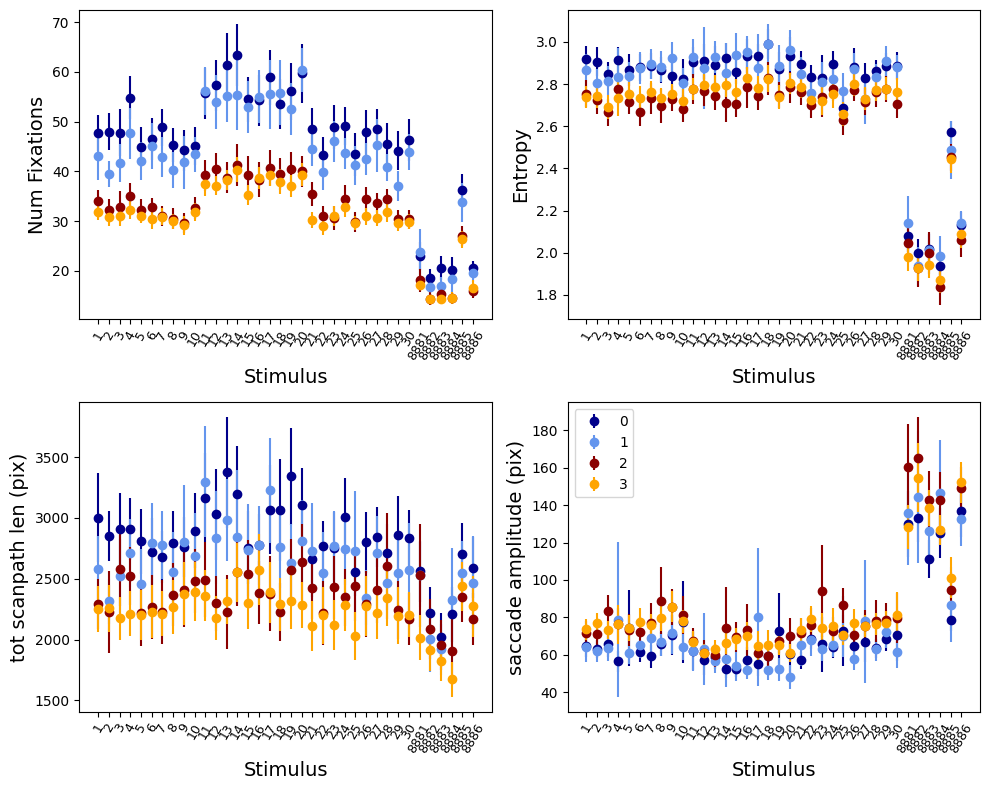

In [24]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1','2','3'])

In [565]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [784]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [785]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [29]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(class_labels):
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()

    return 

!runnning between group comparison
0 0 num participants:  119
0 0 Num fix=  31.52 +/- 6.06
0 0 max num fix=  68.45
0 0 min num fix=  21.14
0 0 Entropy=  2.63 +/- 0.17
0 0 tot scanpath len =  2300.54 +/- 531.55 pix
0 0 saccade amplitude =  84.34 +/- 20.42 pix

1 1 num participants:  81
1 1 Num fix=  44.77 +/- 9.27
1 1 max num fix=  79.17
1 1 min num fix=  30.09
1 1 Entropy=  2.74 +/- 0.17
1 1 tot scanpath len =  2748.51 +/- 508.78 pix
1 1 saccade amplitude =  73.46 +/- 15.18 pix



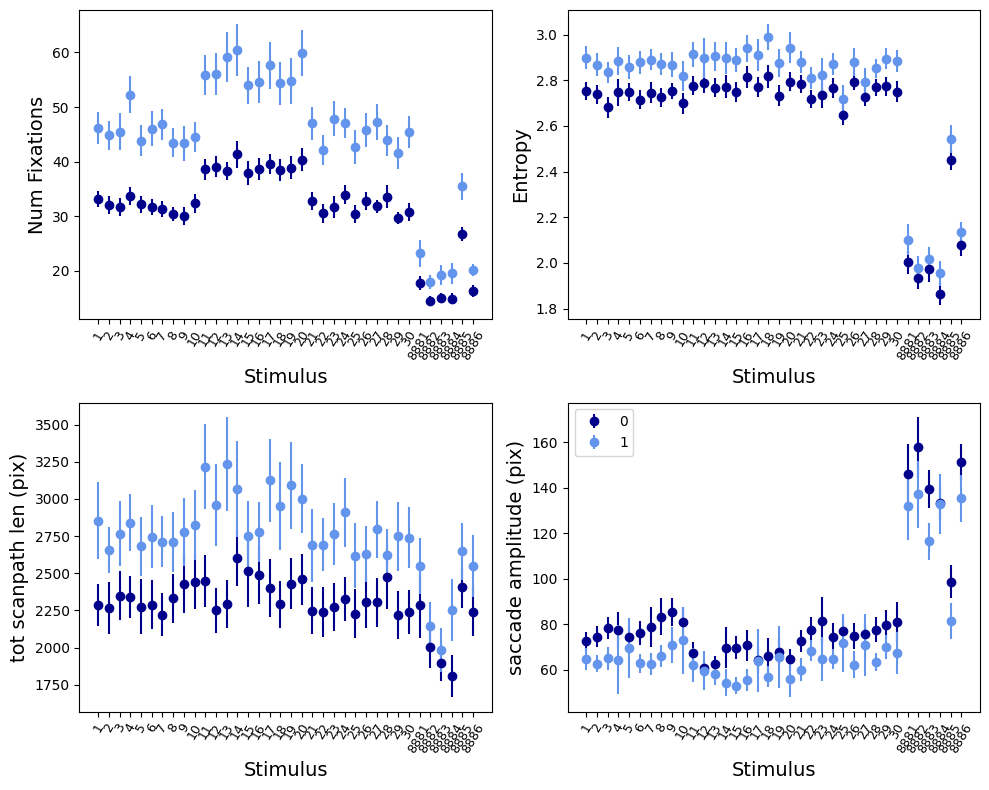

In [30]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1'])

In [31]:
Idx=np.nonzero(WhichC==1)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
#remove nan values
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[ 17.  53.  72.  48.  42.  93.  51.  62.  48.  56.  59.  70.  49.  73.
  69.  50.  53.  54.  42.  57.  nan  54.  66.  52.  34.  47.  78. 107.
  50.  54.  41.  49.  29.  49.  52.  82.  62.  61.  58.  98.  85.  67.
  71.  49.  nan  39.  49.  70.  68. 102.  69.  40.  44.  53.  58.  67.
  64. 104.  57.  96.  65.  76.  65.  64.  69.  39.   9.  nan  77.  nan
  43.  76.  58.  84.  46.  60.  61.  74.  41.  49.  65.]
max num fix=  107.0
min num fix=  9.0
average num fix=  59.922077922077925


In [32]:
Idx=np.nonzero(WhichC==0)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
# remove 1 max and 1 min value
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[43. 45. 32. 46. 30. 56. 27. 32. 53. 40. 33. 49. 54. 41. 47. 33. 73. 25.
 29. 45. 99. 31. 48. 28. 43. 50. 25. 48. 50. 32. 38. 31. 51. 28. 27. 29.
 35. 38. 32. 50. 35. 45. 45. 30. 48. 37. 54. 52. 42. 42. 51. 42. 33. 40.
 38. 38. 42. 37. 32. 27. 42. 40. 40. 28. 37. 26. nan 44. 51. 39. 45. 46.
 34. 34. 38. 49. 52. 57. 40. 33. 36. 42. 58. 46. 30. 32. 37. 51. 41. 31.
 77. 46. 38. 36. 33. 48. 43. 50. 42. 24. 28. nan 20. 29. 24. 35. 30. 38.
 56. 39. 38. 34. 35. 39. 47. 30. 44. 39. 45.]
max num fix=  99.0
min num fix=  20.0
average num fix=  40.35897435897436


In [14]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1)

In [12]:
def angles_entropy(angles, bins):
    hist, _ = np.histogram(angles, bins=bins)
    hist = hist / hist.sum()
    return -np.sum(hist * np.log2(hist))

In [67]:
Saccades = Saccades[0:117, :]
WhichC_Munich = WhichC[0:117]

Group 0
Angle Entropy: 7.114319960071477
---------------------------------------------------------
Group 1
Angle Entropy: 7.396763654882683
---------------------------------------------------------
 
t-test between groups 0 and 1
t: -1.559467845302823, p: 0.11888775137063351
 


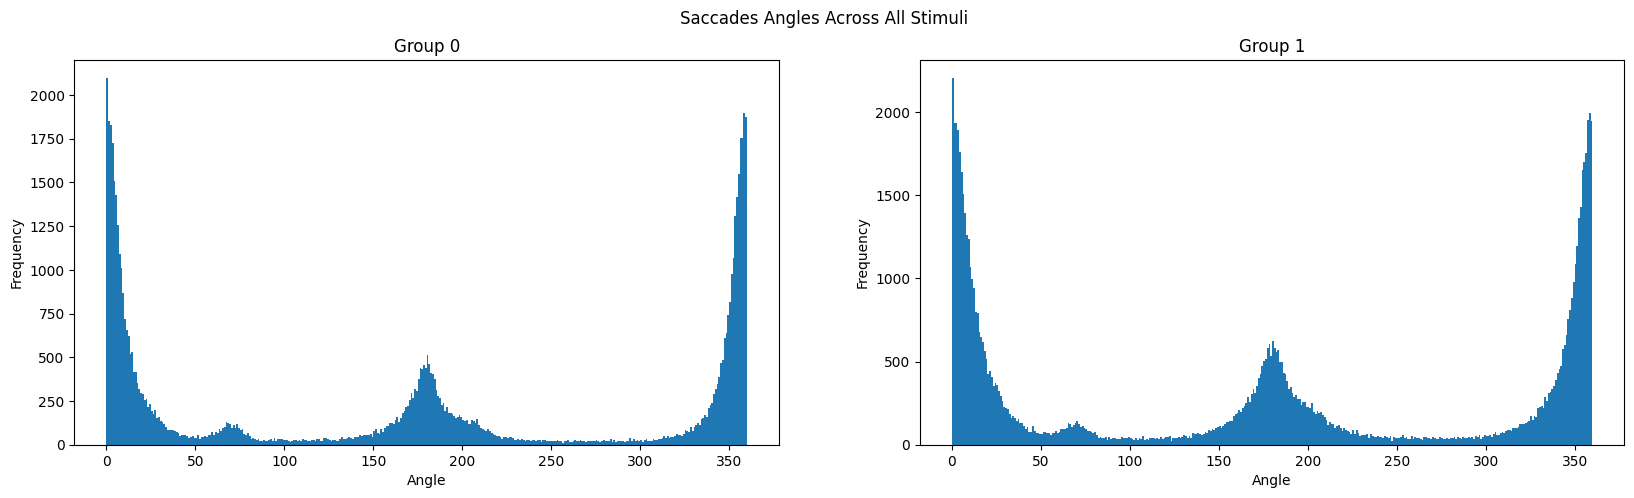

In [52]:
from scipy.stats import ttest_ind
# Initialize variables to store aggregated data
aggregated_angles = {group: [] for group in np.unique(WhichC_Munich)}

# Iterate over all stimuli
for stim in range(DyslexiaDat.np):
    groups = np.unique(WhichC_Munich)
    group_saccades = []
    
    # Collect saccades for each group
    for group in groups:
        group_saccades.append(Saccades[WhichC_Munich == group, stim, :, :])
    
    # Aggregate angles for each group
    for j, group in enumerate(group_saccades):
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h, v]:
                        aggregated_angles[groups[j]].append(val)

# Plot the aggregated results
fig, ax = plt.subplots(1, len(aggregated_angles), figsize=(20, 5))
fig.suptitle('Saccades Angles Across All Stimuli')

for i, (group, angles) in enumerate(aggregated_angles.items()):
    ax[i].hist(angles, bins=360)
    ax[i].set_title(f'Group {group}')
    ax[i].set_xlabel('Angle')
    ax[i].set_ylabel('Frequency')
    print(f'Group {group}')
    print(f'Angle Entropy: {angles_entropy(angles, 360)}')
    print(f'---------------------------------------------------------')

# Perform t-test between groups
group_keys = list(aggregated_angles.keys())
t, p = ttest_ind(aggregated_angles[group_keys[0]], aggregated_angles[group_keys[1]])
print(' ')
print(f't-test between groups {group_keys[0]} and {group_keys[1]}')
print(f't: {t}, p: {p}')
print(' ')

plt.show()


In [786]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

In [42]:
# SimVals[subjects][group]
def calculate_accuracy(SimVals, WhichCN, Idx):
    correct_labels = 0

    for i, subj in enumerate(Idx):
        # Calculate the mean for each group for the current subject
        predicted_group = 0
        min_mean = np.inf
        for j in range(np.unique(WhichCN).size):
            if len(SimVals[i][j]) > 0:
                mean = np.mean(SimVals[i][j])
            else:
                continue
            if mean <= min_mean:
                min_mean = mean
                predicted_group = j
        
        # Check if the predicted group matches the true group
        if predicted_group == WhichCN[subj]:
            correct_labels += 1
    
    # Calculate accuracy
    accuracy = correct_labels / len(Idx)
    print(f'Accuracy: {accuracy * 100:.2f}%')

In [43]:
stimn = 28

In [44]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=0, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

In [45]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 50.43%


In [47]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:657: RuntimeWarning: Mean of empty slice
  SimVals[s1_idx][group].append(np.nanmean(tot_val))


In [48]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 51.28%


---

In [49]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=1, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [50]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 70.09%


In [51]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [52]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 57.26%


---

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

We start from the Similarity features of a single stimulus

In [787]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [788]:
list(set_subj)

[128,
 130,
 133,
 134,
 136,
 137,
 138,
 139,
 141,
 142,
 145,
 146,
 147,
 149,
 150,
 152,
 153,
 154,
 155,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 169,
 171,
 173,
 176,
 177,
 178,
 179,
 181,
 182,
 184,
 185,
 186,
 188,
 191,
 195,
 196,
 197,
 198,
 199,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

In [789]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [790]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': progressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [774]:
stimuli = list(range(0, 30))

In [635]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\nickp\AppData\Local\Temp\ipykernel_25320\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()


Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [791]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [853]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', match=False, Thr=0)

In [793]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [794]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  for v in range(nVer):


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [854]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(GrazSubs_Idx))

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(5):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(MunichSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [855]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 74 train subjects so 74 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

5
30
74
9


In [856]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [857]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(210, 110)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(110, 55)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(55, 27) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(27, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

In [858]:
def train_test_pipeline(stimuli):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(5):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)
            
        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)

        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        

        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)

        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.8)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

In [859]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.6825000047683716
Epoch 5 loss: 0.4417200982570648
Epoch 10 loss: 0.35098183155059814
Epoch 15 loss: 0.3318507671356201
Epoch 0 loss: 0.6572619676589966
Epoch 5 loss: 0.41265997290611267
Epoch 10 loss: 0.3531438410282135
Epoch 15 loss: 0.33776262402534485
Epoch 0 loss: 0.6889740228652954
Epoch 5 loss: 0.39204728603363037
Epoch 10 loss: 0.3314552903175354
Epoch 15 loss: 0.3396889269351959
Epoch 0 loss: 0.8933721780776978
Epoch 5 loss: 0.4479502737522125
Epoch 10 loss: 0.3404725193977356
Epoch 15 loss: 0.3398721218109131
Epoch 0 loss: 0.7331852316856384
Epoch 5 loss: 0.3978247344493866
Epoch 10 loss: 0.36165887117385864
Epoch 15 loss: 0.35815635323524475
Average accuracy: 0.9111111111111111
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[31.  4.]
 [ 0. 10.]]
False positives: 4.0
False negatives: 0.0


In [860]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, subj_id in enumerate(subj):
        # add general features
        vector_roi[s][0] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][1] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][2] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [861]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 80)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(80, 40)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(40, 2) 
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.softmax(self.fc3(x)) 
        return x

In [862]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7113519906997681
Epoch 5 loss: 0.5223296880722046
Epoch 10 loss: 0.42292389273643494
Epoch 15 loss: 0.38103535771369934
Epoch 0 loss: 0.6685770153999329
Epoch 5 loss: 0.4626549780368805
Epoch 10 loss: 0.39276495575904846
Epoch 15 loss: 0.3662188649177551
Epoch 0 loss: 0.6207109093666077
Epoch 5 loss: 0.4694352447986603
Epoch 10 loss: 0.4344615936279297
Epoch 15 loss: 0.3772357106208801
Epoch 0 loss: 0.867193877696991
Epoch 5 loss: 0.5288070440292358
Epoch 10 loss: 0.41387006640434265
Epoch 15 loss: 0.38758376240730286
Epoch 0 loss: 0.7111890912055969
Epoch 5 loss: 0.494831919670105
Epoch 10 loss: 0.4136984646320343
Epoch 15 loss: 0.35270223021507263
Average accuracy: 0.7555555555555555
Standard deviation: 0.10886621079036345
Total confusion matrix:
[[29.  6.]
 [ 5.  5.]]
False positives: 6.0
False negatives: 5.0


In [863]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 180)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(180, 90)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(90, 40) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(40, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [864]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [865]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 180)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(180, 90)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(90, 40) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(40, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [866]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.6223503947257996
Epoch 5 loss: 0.37321099638938904
Epoch 10 loss: 0.34430715441703796
Epoch 15 loss: 0.3427586555480957
Epoch 0 loss: 0.6762841939926147
Epoch 5 loss: 0.41583436727523804
Epoch 10 loss: 0.34895220398902893
Epoch 15 loss: 0.3292372524738312
Epoch 0 loss: 0.757829487323761
Epoch 5 loss: 0.39657115936279297
Epoch 10 loss: 0.36532527208328247
Epoch 15 loss: 0.3320029377937317
Epoch 0 loss: 0.8399472236633301
Epoch 5 loss: 0.44260701537132263
Epoch 10 loss: 0.3573405146598816
Epoch 15 loss: 0.342744916677475
Epoch 0 loss: 0.6936753988265991
Epoch 5 loss: 0.47978776693344116
Epoch 10 loss: 0.3656359910964966
Epoch 15 loss: 0.31849339604377747
Average accuracy: 0.888888888888889
Standard deviation: 0.07027283689263066
Total confusion matrix:
[[30.  5.]
 [ 0. 10.]]
False positives: 5.0
False negatives: 0.0


In [867]:

import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Approximation Error: 0.00010195739014307037 (< 0.05 is good)

FEATURE ANALYSIS


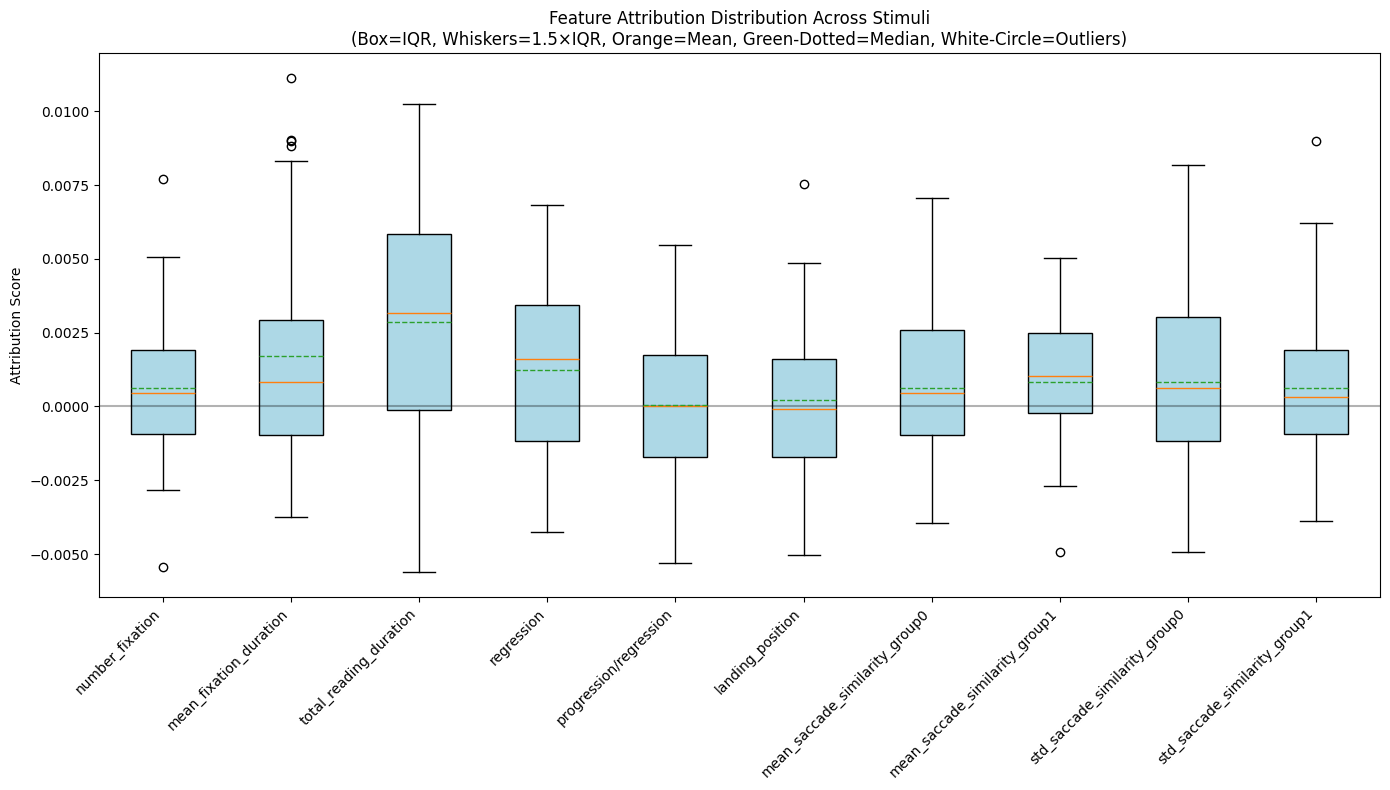


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0006, Std= 0.0024, Min=-0.0055, Max= 0.0077
mean_fixation_duration        : Mean= 0.0017, Std= 0.0039, Min=-0.0038, Max= 0.0111
total_reading_duration        : Mean= 0.0029, Std= 0.0038, Min=-0.0056, Max= 0.0102
regression                    : Mean= 0.0012, Std= 0.0030, Min=-0.0043, Max= 0.0068
progression/regression        : Mean= 0.0000, Std= 0.0026, Min=-0.0053, Max= 0.0055
landing_position              : Mean= 0.0002, Std= 0.0027, Min=-0.0050, Max= 0.0075
mean_saccade_similarity_group0: Mean= 0.0006, Std= 0.0028, Min=-0.0039, Max= 0.0071
mean_saccade_similarity_group1: Mean= 0.0008, Std= 0.0023, Min=-0.0049, Max= 0.0050
std_saccade_similarity_group0 : Mean= 0.0008, Std= 0.0030, Min=-0.0049, Max= 0.0082
std_saccade_similarity_group1 : Mean= 0.0006, Std= 0.0030, Min=-0.0039, Max= 0.0090


In [868]:
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

Firstly we can notice that only the global features are giving good performance, but lower compared to the similarity features.

In [869]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [870]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 140)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(140, 70)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(70, 40) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(40, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7621539831161499
Epoch 5 loss: 0.42782092094421387
Epoch 10 loss: 0.34867846965789795
Epoch 15 loss: 0.32920727133750916
Epoch 0 loss: 0.7192221879959106
Epoch 5 loss: 0.41881176829338074
Epoch 10 loss: 0.35383185744285583
Epoch 15 loss: 0.3269399404525757
Epoch 0 loss: 0.7157326340675354
Epoch 5 loss: 0.4064923822879791
Epoch 10 loss: 0.33722907304763794
Epoch 15 loss: 0.3303738534450531
Epoch 0 loss: 0.7851711511611938
Epoch 5 loss: 0.41943463683128357
Epoch 10 loss: 0.3608245849609375
Epoch 15 loss: 0.3309612572193146
Epoch 0 loss: 0.8292284607887268
Epoch 5 loss: 0.4513092637062073
Epoch 10 loss: 0.3579604923725128
Epoch 15 loss: 0.32999151945114136
Average accuracy: 0.9555555555555555
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[33.  2.]
 [ 0. 10.]]
False positives: 2.0
False negatives: 0.0


In [851]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]

Approximation Error: -0.0005219409940764308 (< 0.05 is good)

FEATURE ANALYSIS


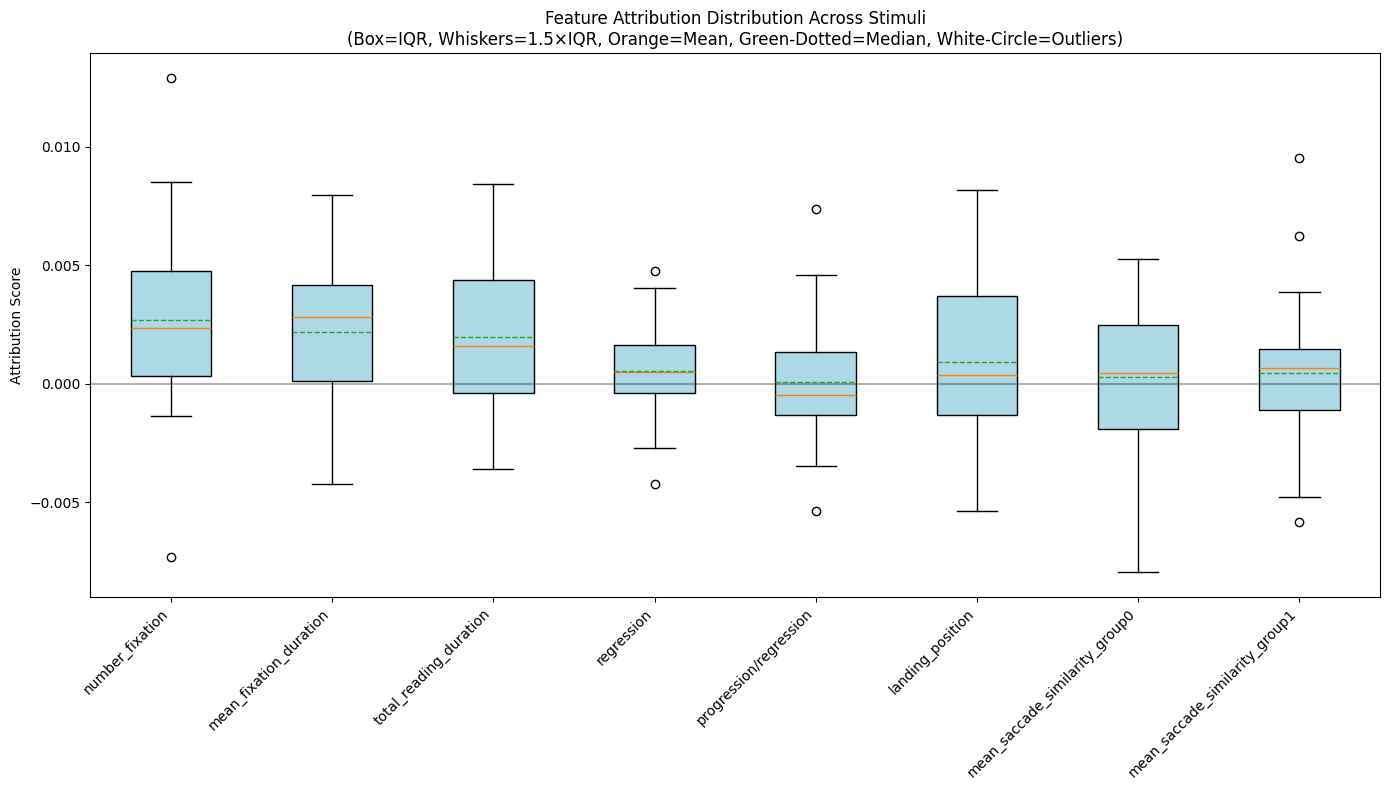


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0027, Std= 0.0037, Min=-0.0073, Max= 0.0129
mean_fixation_duration        : Mean= 0.0022, Std= 0.0029, Min=-0.0042, Max= 0.0080
total_reading_duration        : Mean= 0.0020, Std= 0.0031, Min=-0.0036, Max= 0.0084
regression                    : Mean= 0.0005, Std= 0.0019, Min=-0.0042, Max= 0.0047
progression/regression        : Mean= 0.0001, Std= 0.0026, Min=-0.0054, Max= 0.0074
landing_position              : Mean= 0.0009, Std= 0.0035, Min=-0.0054, Max= 0.0082
mean_saccade_similarity_group0: Mean= 0.0003, Std= 0.0030, Min=-0.0080, Max= 0.0053
mean_saccade_similarity_group1: Mean= 0.0005, Std= 0.0029, Min=-0.0058, Max= 0.0095


In [852]:
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [871]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [872]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 140)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(140, 70)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(70, 40) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(40, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7279481291770935
Epoch 5 loss: 0.43712419271469116
Epoch 10 loss: 0.36679455637931824
Epoch 15 loss: 0.35875800251960754
Epoch 0 loss: 0.6852757334709167
Epoch 5 loss: 0.4723791182041168
Epoch 10 loss: 0.37493568658828735
Epoch 15 loss: 0.34233424067497253
Epoch 0 loss: 0.7021624445915222
Epoch 5 loss: 0.4132223129272461
Epoch 10 loss: 0.3660764694213867
Epoch 15 loss: 0.35036665201187134
Epoch 0 loss: 0.7536913156509399
Epoch 5 loss: 0.4154345393180847
Epoch 10 loss: 0.36266717314720154
Epoch 15 loss: 0.3546825051307678
Epoch 0 loss: 0.8433425426483154
Epoch 5 loss: 0.4725612998008728
Epoch 10 loss: 0.3682268559932709
Epoch 15 loss: 0.3433268964290619
Average accuracy: 0.8222222222222222
Standard deviation: 0.08888888888888888
Total confusion matrix:
[[29.  6.]
 [ 2.  8.]]
False positives: 6.0
False negatives: 2.0


In [873]:
feature_names = [
    "number_fixation",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]

Approximation Error: 0.00012768771557603031 (< 0.05 is good)

FEATURE ANALYSIS


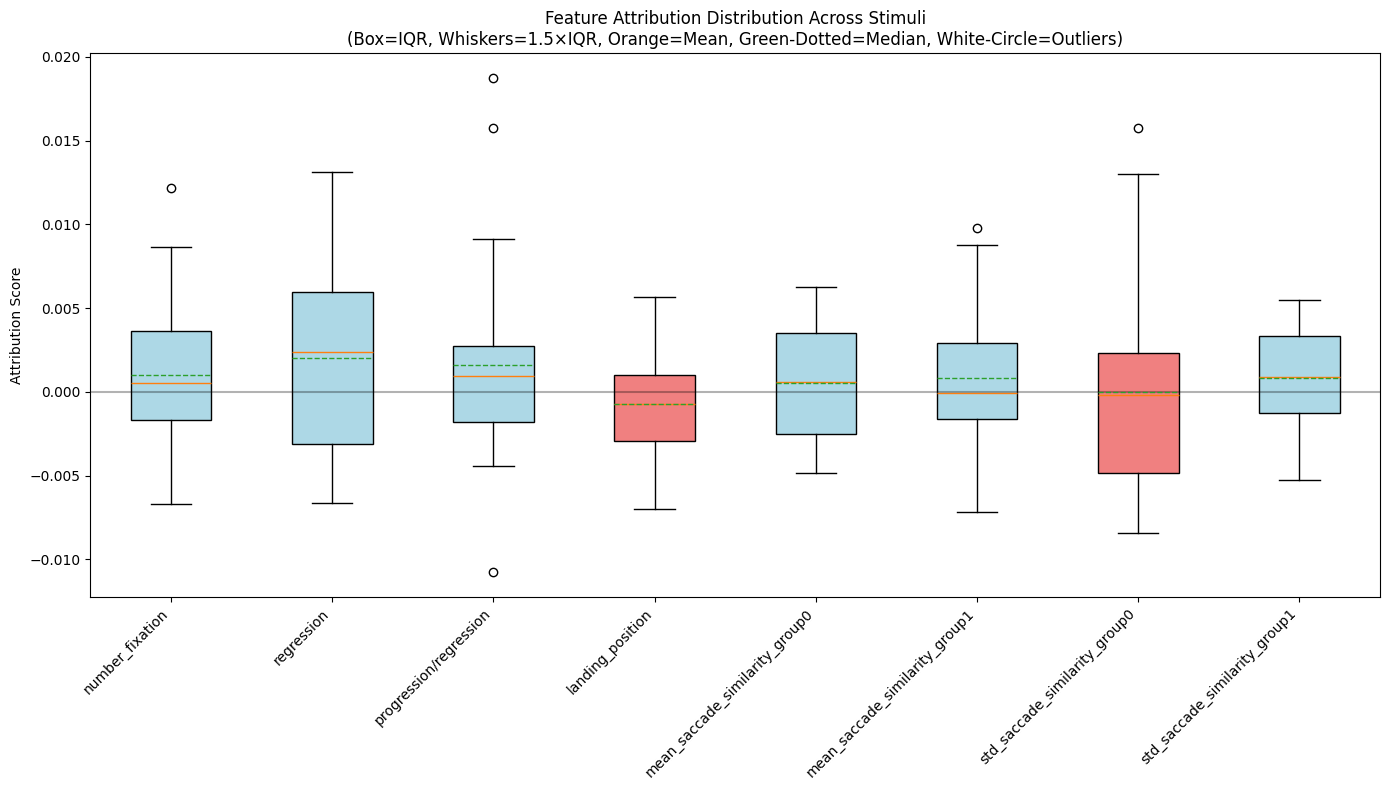


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0010, Std= 0.0042, Min=-0.0067, Max= 0.0122
regression                    : Mean= 0.0020, Std= 0.0053, Min=-0.0066, Max= 0.0131
progression/regression        : Mean= 0.0016, Std= 0.0056, Min=-0.0108, Max= 0.0187
landing_position              : Mean=-0.0007, Std= 0.0029, Min=-0.0070, Max= 0.0056
mean_saccade_similarity_group0: Mean= 0.0005, Std= 0.0034, Min=-0.0048, Max= 0.0063
mean_saccade_similarity_group1: Mean= 0.0008, Std= 0.0046, Min=-0.0071, Max= 0.0098
std_saccade_similarity_group0 : Mean=-0.0000, Std= 0.0058, Min=-0.0084, Max= 0.0158
std_saccade_similarity_group1 : Mean= 0.0008, Std= 0.0031, Min=-0.0052, Max= 0.0055


In [874]:
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

Removing some features (that we already tested in the ETDD70 dataset) we can see that the performance is still good, with a lower average accuracy and a lower standard deviation.

---

## CNN 

We proceed to transform the fixation in a continuous signal and calculate the magnitude of the signal in the time domain that it will be used as input for a convolutional neural network.

In [875]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct
from scipy.fft import fft

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [69]:
FixData['Group'].unique()

array([ 4.,  1.,  3.,  2., nan])

In [25]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft

In [ ]:
def get_data(stim, split_size, batch_size, random_state, verbose=False):
    # Splitting by participants
    # Remove subjects that start with P
    FixData2 = FixData[~FixData['subject'].str.startswith('P')]
    map_subj = [DyslexiaDat.subjects[sub] for sub in set_subj]
    FixData2 = FixData2[~FixData2['subject'].isin(map_subj)]
    Data=FixData2[FixData2['stimulus']==stim]
    subj = Data['subject'].unique()
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    train_data = Data[Data['subject'].isin(train_participants)]
    test_data = Data[Data['subject'].isin(test_participants)]
    train_labels = train_data.groupby('subject')['Group'].first().values
    test_labels = test_data.groupby('subject')['Group'].first().values

    # change train labels
    train_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in train_labels])
    test_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in test_labels])

    # Pad the data to the same length (number of rows for subject)
    max_length_train = max(len(train_data[(train_data['subject'] == subj) & 
                                    ((train_data['Group'] == 4.0) | (train_data['Group'] == 3.0))]) 
                     for subj in train_participants)
    max_length_test = max(len(test_data[(test_data['subject'] == subj) &
                                    ((test_data['Group'] == 4.0) | (test_data['Group'] == 3.0))])
                        for subj in test_participants)
    pad = max(max_length_train, max_length_test)

    if verbose:
        print(f"Train participants: {len(train_participants)}")
        print(f"Test participants: {len(test_participants)}")
        print(f"Pad size: {pad}")

    # "Eye tracking based dyslexia detection using a holistic approach"
    # Step 1: Perform DCT Type III (and interpoalte Step 2)
    def perform_dct_interpolate(data, pad_size):
        # sqrt(2/pad_size) * cn * cos((pi * ((2*k + 1) * n)) / (2 * pad_size)) k = 0, 1, ..., pad_size - 1 n = 0, 1, ..., pad_size - 1
        dct_result = np.zeros((pad_size, data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(pad_size):
                cn = np.sqrt(2 / pad_size) if k != 0 else np.sqrt(1 / pad_size)
                dct_result[k, n] = cn * np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * pad_size)))
        return dct_result
    
    # Step 3: Perform IDCT Type III
    def perform_idct(data):
        idct_result = np.zeros((data.shape[0], data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(data.shape[0]):
                idct_result[k, n] = np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * data.shape[0])) * (np.sqrt(2 / data.shape[0]) if k != 0 else np.sqrt(1 / data.shape[0])))
        return idct_result
    
    # Step 4: Energy correction based on number of zeros
    def correct_energy(data, original_length):
        # Calculate the ratio of the original length to the padded length
        ratio = original_length / data.shape[0]
        return data * ratio
    
    # Step 5: Perform Discrete Fourier Transform (DFT)
    def perfrom_dft(data):
        return fft(data, axis=0)
    
    # Step 6: Magnitude calculation
    def calculate_magnitude(data):
        return np.abs(data)
    
    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        #for the final data we can return just N/2 as the data is symmetric
        final_data = magnitude[:magnitude.shape[0]//2]
        return final_data
    
    # Apply the pipeline to all participants

    train_features = []
    test_features = []
    for subj in train_participants:
        data = train_data[train_data['subject'] == subj].iloc[:, 5:7].values
        train_features.append(data_output(data, pad))
    
    for subj in test_participants:
        data = test_data[test_data['subject'] == subj].iloc[:, 5:7].values
        test_features.append(data_output(data, pad))

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    test_labels = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)
    
    # Create DataLoader
    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    return train_loader, test_loader, train_features, train_labels, test_features, test_labels

In [128]:
stimulus = DyslexiaDat.stimuli[12]

In [139]:
# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Enable verbose mode
verbose = True

# Load data
train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim=stimulus, split_size=0.1, batch_size=32, random_state=42, verbose=True
)

Train participants: 103
Test participants: 12
Pad size: 60


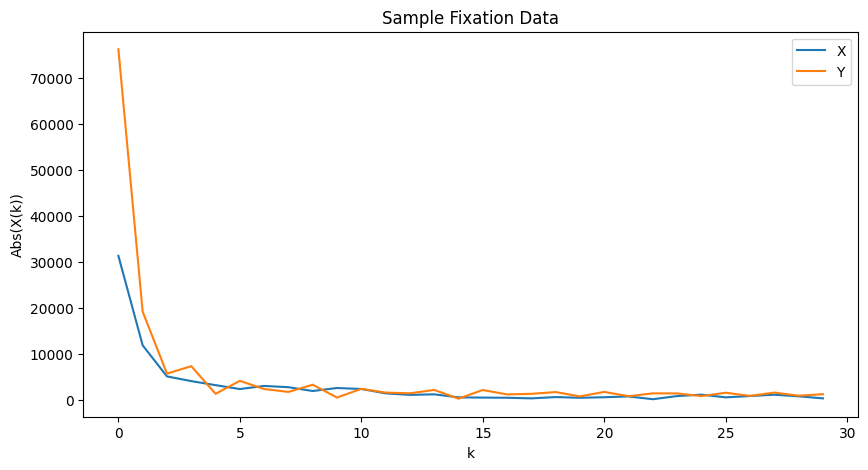

In [145]:
plt.figure(figsize=(10, 5))
plt.plot(train_data[0, :, 0], label='X')
plt.plot(test_data[0, :, 1], label='Y')
plt.xlabel('k')
plt.ylabel('Abs(X(k))')
plt.title('Sample Fixation Data')
plt.legend()
plt.show()

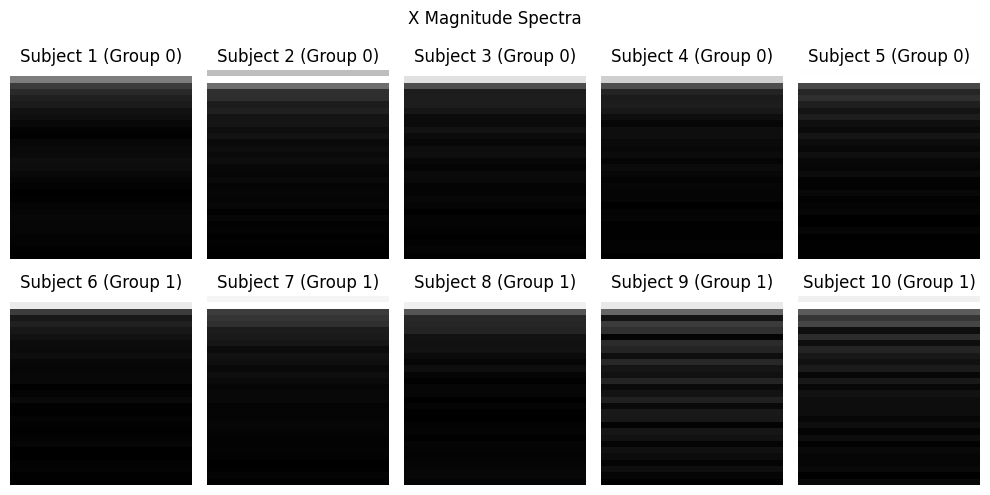

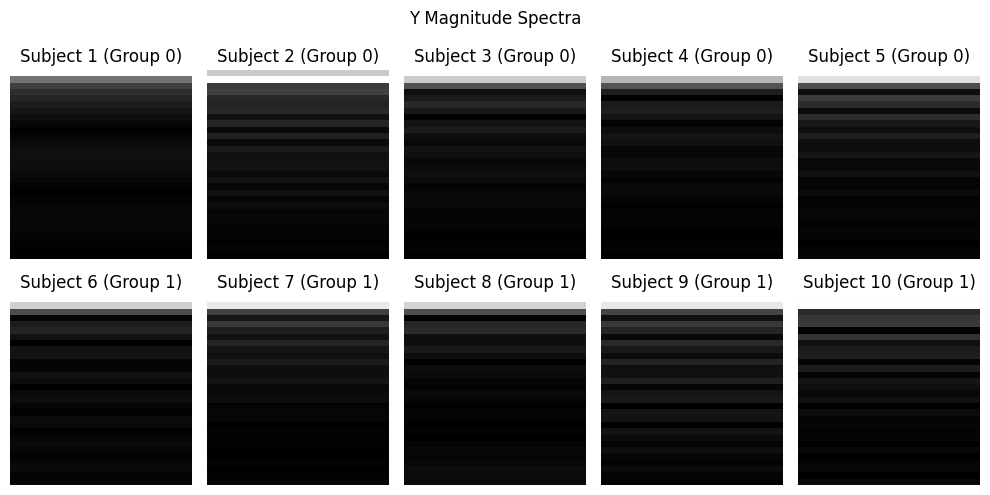

In [175]:
def plot_group_spectra(features, labels, title, channel):
    """
    Plots magnitude spectra for 5 subjects with label 0 vs. 5 subjects with label 1
    in a vertical grayscale heatmap.
    """
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(features[labels.squeeze() == 0][i][:, channel].reshape(-1, 1), aspect='auto', cmap='gray')
        plt.title(f'Subject {i+1} (Group 0)')
        plt.axis('off')

    for i in range(5):
        plt.subplot(2, 5, i + 6)
        plt.imshow(features[labels.squeeze() == 1][i][:, channel].reshape(-1, 1), aspect='auto', cmap='gray')
        plt.title(f'Subject {i+6} (Group 1)')
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
# Plot for X and Y magnitudes
plot_group_spectra(train_data, train_labels, 'X Magnitude Spectra', channel=0)
plot_group_spectra(train_data, train_labels, 'Y Magnitude Spectra', channel=1)

In [180]:
class CNN(nn.Module):
    def __init__(self, num_classes, input_channels=2):
        super(CNN, self).__init__()
        # Three Conv1d layers with kernel_size=3, stride=1, padding=1
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # MaxPool1d layer (kernel_size=2, stride=2)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        # Activation function
        self.relu = nn.ReLU()
        
        # Fully connected layer
        final_seq_len = 30 // 2  # integer division
        # The flattened feature dimension will be: 32 channels * final_seq_len
        self.fc = nn.Linear(32 * final_seq_len, num_classes)

    def forward(self, x):
        # Input x shape: [batch, sequence_length, channels]
        # Transpose to [batch, channels, sequence_length] for Conv1d
        x = x.transpose(1, 2)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        # Flatten the features for the fully connected layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [181]:
# ---------------------
# Setup training
# ---------------------

torch.manual_seed(42)
np.random.seed(42)

accuracy = []

for i in range(5):
    # Load data
    train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim=stimulus, split_size=0.1, batch_size=8, random_state=i
    )
    # Determine number of classes from training labels.
    # Here we assume train_labels is a tensor containing integer class labels.
    num_classes = len(torch.unique(train_labels))
    model = CNN(num_classes=num_classes, input_channels=2).to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    # ---------------------
    # Training loop
    # ---------------------
    num_epochs = 20  # Adjust as needed
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for features, labels in train_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze().long()
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * features.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        # print every 10 epochs
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # ---------------------
    # Evaluation
    # ---------------------
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy.append(100 * correct / total)
    
print(f"Average Test Accuracy: {np.mean(accuracy):.2f}%")
print(f"Standard Deviation: {np.std(accuracy):.2f}")

Epoch 5/20, Loss: 7.5453
Epoch 10/20, Loss: 2.2530
Epoch 15/20, Loss: 4.8308
Epoch 20/20, Loss: 1.0704
Epoch 5/20, Loss: 15.6852
Epoch 10/20, Loss: 4.6636
Epoch 15/20, Loss: 2.1975
Epoch 20/20, Loss: 1.4034
Epoch 5/20, Loss: 3.8607
Epoch 10/20, Loss: 1.8835
Epoch 15/20, Loss: 1.2118
Epoch 20/20, Loss: 0.4838
Epoch 5/20, Loss: 6.1839
Epoch 10/20, Loss: 2.0920
Epoch 15/20, Loss: 2.9411
Epoch 20/20, Loss: 1.5193
Epoch 5/20, Loss: 5.2401
Epoch 10/20, Loss: 1.1130
Epoch 15/20, Loss: 0.7517
Epoch 20/20, Loss: 3.8172
Average Test Accuracy: 51.67%
Standard Deviation: 8.16


## Multiple stimuli

In [491]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft
import numpy as np
import torch

def get_data(stim_list, split_size, batch_size, random_state, verbose=False):
    # Filter by stimuli list and remove subjects that start with 'P'
    FixData2 = FixData[~FixData['subject'].str.startswith('P')]
    map_subj = [DyslexiaDat.subjects[sub] for sub in set_subj]
    FixData2 = FixData2[~FixData2['subject'].isin(map_subj)]
    Data = FixData2[FixData2['stimulus'].isin(stim_list)]
    subj = Data['subject'].unique()

    
    # Split by participants
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    train_data = Data[Data['subject'].isin(train_participants)]
    test_data = Data[Data['subject'].isin(test_participants)]
    
    train_labels = train_data.groupby('subject')['Group'].first().values
    test_labels = test_data.groupby('subject')['Group'].first().values

    # Binary label transformation
    train_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in train_labels])
    test_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in test_labels])

    # Determine padding size
    pad = 0
    for stim in stim_list:
        max_length_train = max(len(train_data[(train_data['subject'] == subj) & (train_data['stimulus'] == stim) &
                                            ((train_data['Group'] == 4.0) | (train_data['Group'] == 3.0))]) 
                            for subj in train_participants)
        max_length_test = max(len(test_data[(test_data['subject'] == subj)  & (test_data['stimulus'] == stim) &
                                            ((test_data['Group'] == 4.0) | (test_data['Group'] == 3.0))]) 
                            for subj in test_participants)
        pad = max(pad, max_length_train, max_length_test)

    if verbose:
        print(f"Train participants: {len(train_participants)}")
        print(f"Test participants: {len(test_participants)}")
        print(f"Pad size: {pad}")
        print(f"Using stimuli: {stim_list}")

    # DCT, IDCT, energy correction, DFT, magnitude
    def perform_dct_interpolate(data, pad_size):
        dct_result = np.zeros((pad_size, data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(pad_size):
                cn = np.sqrt(2 / pad_size) if k != 0 else np.sqrt(1 / pad_size)
                dct_result[k, n] = cn * np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * pad_size)))
        return dct_result

    def perform_idct(data):
        idct_result = np.zeros((data.shape[0], data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(data.shape[0]):
                idct_result[k, n] = np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * data.shape[0])) * 
                                           (np.sqrt(2 / data.shape[0]) if k != 0 else np.sqrt(1 / data.shape[0])))
        return idct_result

    def correct_energy(data, original_length):
        ratio = original_length / data.shape[0]
        return data * ratio

    def perfrom_dft(data):
        return fft(data, axis=0)

    def calculate_magnitude(data):
        return np.abs(data)

    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        return magnitude[:magnitude.shape[0] // 2]

    # Process all train/test participants
    train_features = []
    test_features = []

    for subj in train_participants:
        data = train_data[train_data['subject'] == subj].iloc[:, 5:7].values
        train_features.append(data_output(data, pad))

    for subj in test_participants:
        data = test_data[test_data['subject'] == subj].iloc[:, 5:7].values
        test_features.append(data_output(data, pad))

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    test_labels = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

    # Create DataLoaders
    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, test_loader, train_features, train_labels, test_features, test_labels


In [492]:
# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Enable verbose mode
verbose = True

# Load data
train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim_list=[3, 13], split_size=0.1, batch_size=32, random_state=42, verbose=True
)

Train participants: 79
Test participants: 9
Pad size: 62
Using stimuli: [3, 13]


In [502]:
class CNN(nn.Module):
    def __init__(self, num_classes, input_channels=2):
        super(CNN, self).__init__()
        # Three Conv1d layers with kernel_size=3, stride=1, padding=1
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # MaxPool1d layer (kernel_size=2, stride=2)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        # Activation function
        self.relu = nn.ReLU()
        
        # Fully connected layer
        final_seq_len = 38 // 2  # integer division
        # The flattened feature dimension will be: 32 channels * final_seq_len
        self.fc = nn.Linear(32 * final_seq_len, num_classes)

    def forward(self, x):
        # Input x shape: [batch, sequence_length, channels]
        # Transpose to [batch, channels, sequence_length] for Conv1d
        x = x.transpose(1, 2)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        # Flatten the features for the fully connected layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [508]:
# ---------------------
# Setup training
# ---------------------

torch.manual_seed(42)
np.random.seed(42)

accuracy = []

for i in range(5):
    # Load data
    train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
        stim_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], split_size=0.1, batch_size=64, random_state=i
    )
    # Determine number of classes from training labels.
    # Here we assume train_labels is a tensor containing integer class labels.
    num_classes = len(torch.unique(train_labels))
    model = CNN(num_classes=num_classes, input_channels=2).to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    # ---------------------
    # Training loop
    # ---------------------
    num_epochs = 500  # Adjust as needed
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for features, labels in train_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze().long()
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * features.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        # print every 10 epochs
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # ---------------------
    # Evaluation
    # ---------------------
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy.append(100 * correct / total)
    
print(f"Average Test Accuracy: {np.mean(accuracy):.2f}%")
print(f"Standard Deviation: {np.std(accuracy):.2f}")

Epoch 50/500, Loss: 208.3292
Epoch 100/500, Loss: 75.6240
Epoch 150/500, Loss: 19.8054
Epoch 200/500, Loss: 18.9331
Epoch 250/500, Loss: 8.2551
Epoch 300/500, Loss: 1.8593
Epoch 350/500, Loss: 0.3684
Epoch 400/500, Loss: 0.0000
Epoch 450/500, Loss: 0.0000
Epoch 500/500, Loss: 0.0000
Epoch 50/500, Loss: 557.5929
Epoch 100/500, Loss: 218.2157
Epoch 150/500, Loss: 81.4862
Epoch 200/500, Loss: 51.8599
Epoch 250/500, Loss: 26.2802
Epoch 300/500, Loss: 10.3851
Epoch 350/500, Loss: 0.0001
Epoch 400/500, Loss: 0.0000
Epoch 450/500, Loss: 0.0000
Epoch 500/500, Loss: 0.0000
Epoch 50/500, Loss: 711.6724
Epoch 100/500, Loss: 533.8958
Epoch 150/500, Loss: 664.3430
Epoch 200/500, Loss: 208.0903
Epoch 250/500, Loss: 125.9766
Epoch 300/500, Loss: 84.5048
Epoch 350/500, Loss: 60.2952
Epoch 400/500, Loss: 31.0695
Epoch 450/500, Loss: 20.0291
Epoch 500/500, Loss: 2.4324
Epoch 50/500, Loss: 367.7208
Epoch 100/500, Loss: 99.5071
Epoch 150/500, Loss: 38.4754
Epoch 200/500, Loss: 1.9659
Epoch 250/500, Loss: 

---

## HMM

In [523]:
FixData2 = FixData[FixData['subject'].str.startswith('P')]

In [524]:
FixData2['Group'] = FixData2['Group'].replace(4.0, 0)
FixData2['Group'] = FixData2['Group'].replace(3.0, 0)
FixData2['Group'] = FixData2['Group'].replace(np.nan, 0)

FixData2['Group'] = FixData2['Group'].replace(1.0, 1)
FixData2['Group'] = FixData2['Group'].replace(2.0, 1)

C:\Users\nickp\AppData\Local\Temp\ipykernel_25320\1170311762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FixData2['Group'] = FixData2['Group'].replace(4.0, 0)
C:\Users\nickp\AppData\Local\Temp\ipykernel_25320\1170311762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FixData2['Group'] = FixData2['Group'].replace(3.0, 0)
C:\Users\nickp\AppData\Local\Temp\ipykernel_25320\1170311762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [529]:
def remove_outliers_zscore(df, x_col='fix_x', y_col='fix_y', stimulus_col='stimulus', threshold=3):
    """
    Remove outliers using Z-score method for each stimulus
    """
    def filter_outliers_zscore(group):
        # Calculate z-scores
        z_scores_x = np.abs(stats.zscore(group[x_col]))
        z_scores_y = np.abs(stats.zscore(group[y_col]))
        
        # Keep points where both x and y z-scores are below threshold
        mask = (z_scores_x < threshold) & (z_scores_y < threshold)
        
        return group[mask]
    
    return df.groupby(stimulus_col).apply(filter_outliers_zscore).reset_index(drop=True)

FixData2 = remove_outliers_zscore(FixData2, x_col='fix_x', y_col='fix_y', stimulus_col='stimulus', threshold=4.2)

C:\Users\nickp\AppData\Local\Temp\ipykernel_25320\3296811210.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(stimulus_col).apply(filter_outliers_zscore).reset_index(drop=True)


In [530]:
DyslexiaDat2=EyeData(FixData2,sizeX,sizeY)
DyslexiaDat2.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')

dataset size:  (98059, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 83 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:280: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Data for  83 observers and  36  stimuli.
Mean fixation number:  34.53  +/-  9.13
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  2856
Mean X location:  358.8  +/-  15.4  pixels
Mean Y location:  385.1  +/-  12.2  pixels
Mean saccade  amplitude:  61.7  +/-  11.5  pixels
Mean scanpath  length:  1755.3  +/-  301.1  pixels


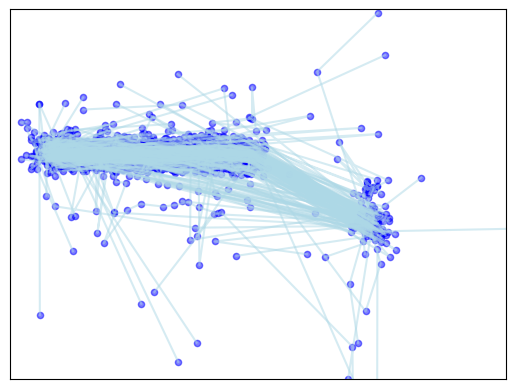

In [445]:
#   DyslexiaDat2.VisScanPath(1,visFix=True,scan_path_col='lightblue', allS=True)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_visuals.py:170: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


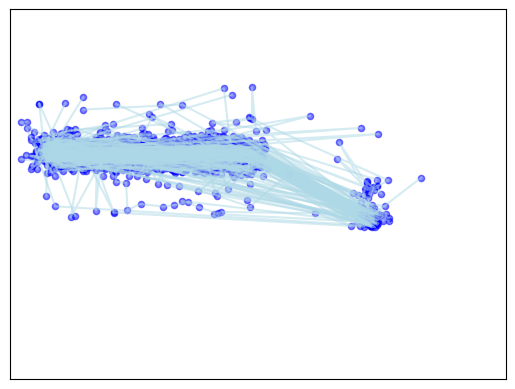

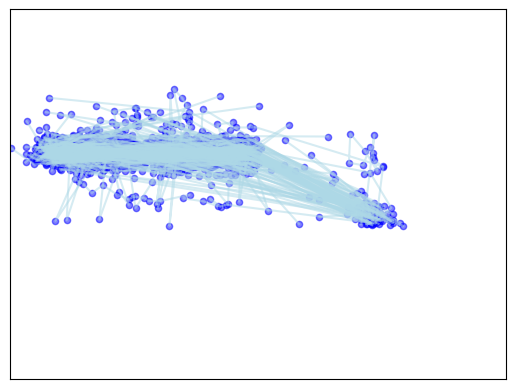

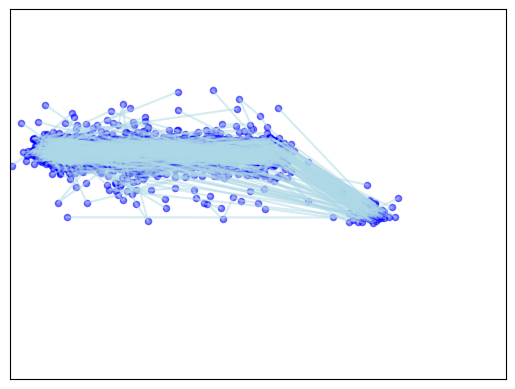

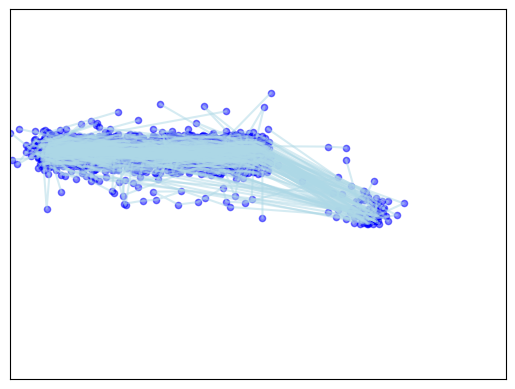

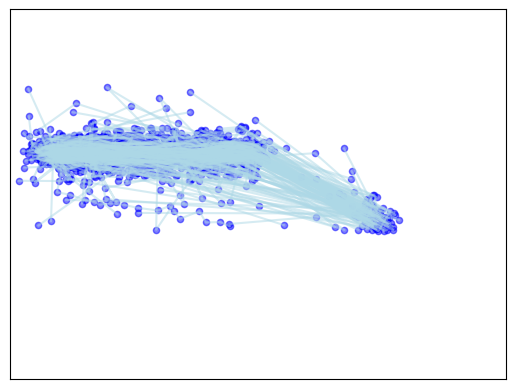

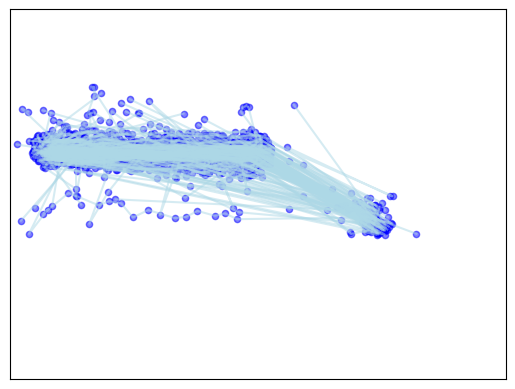

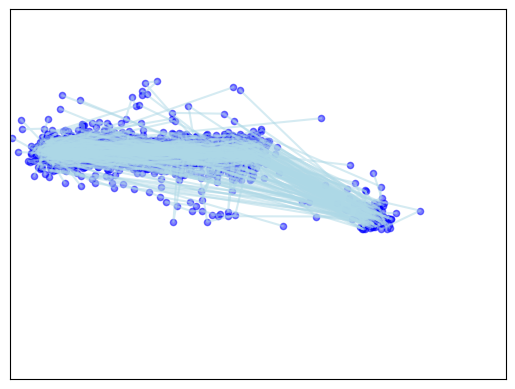

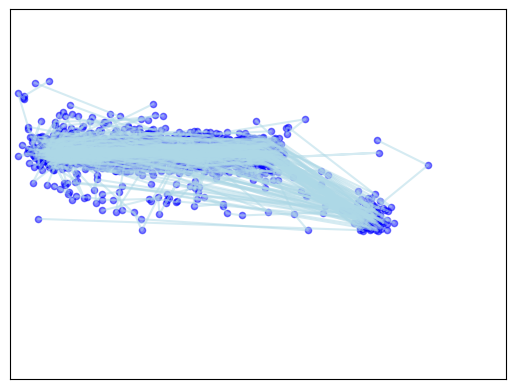

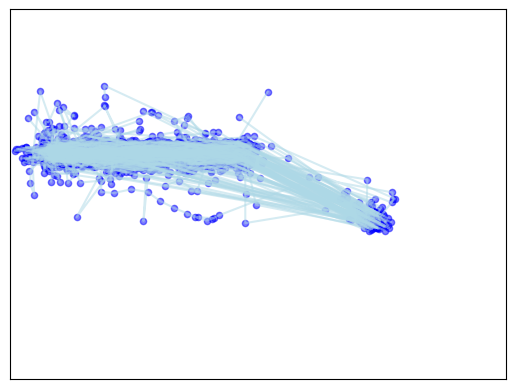

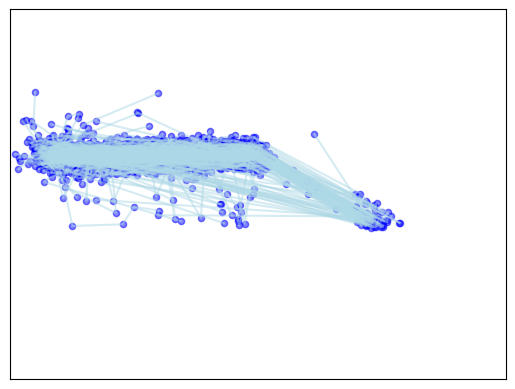

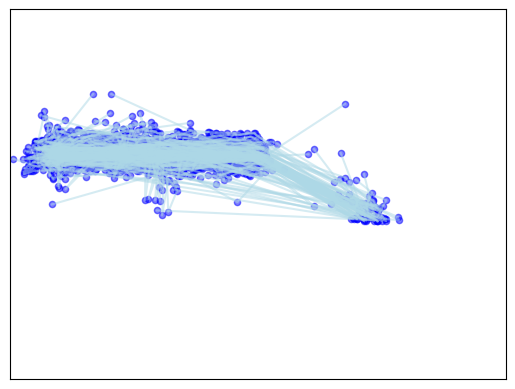

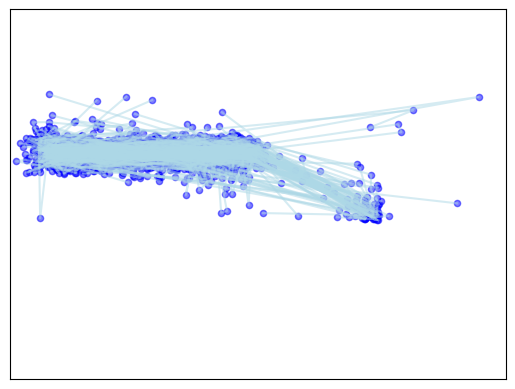

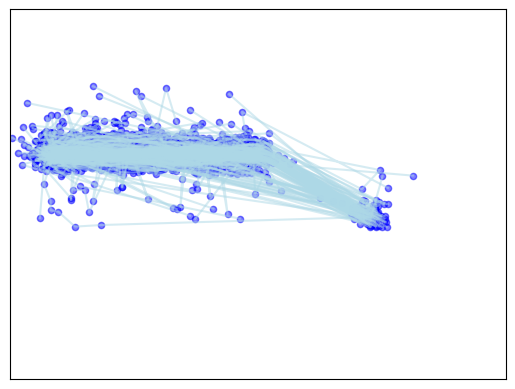

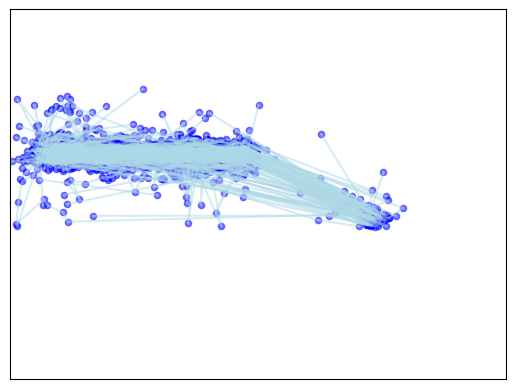

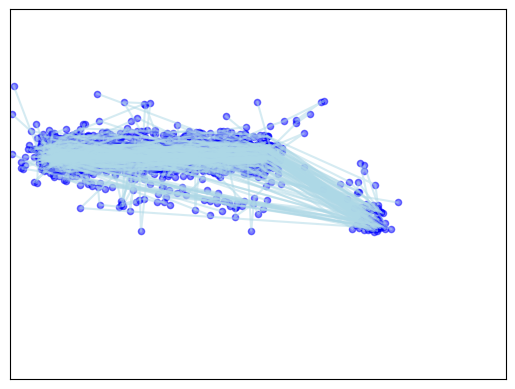

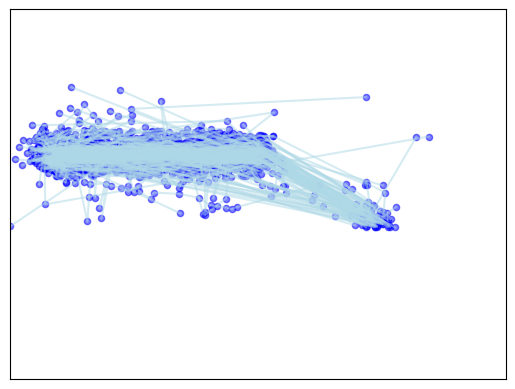

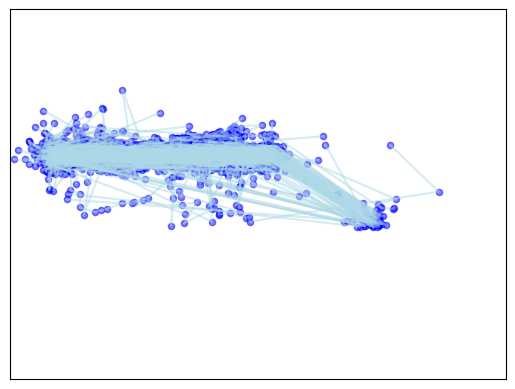

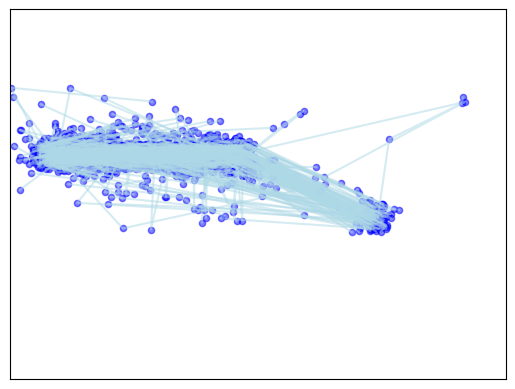

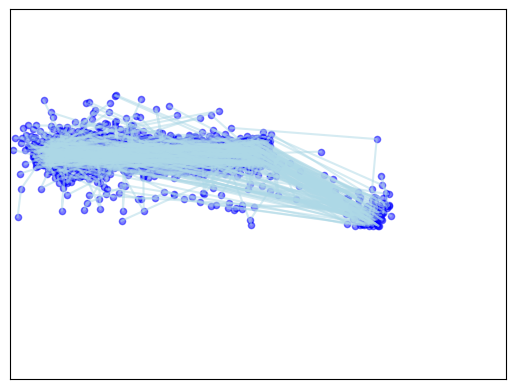

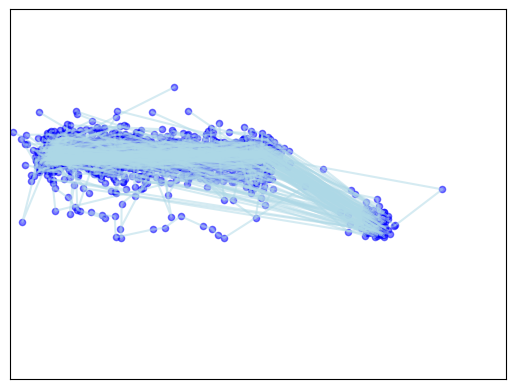

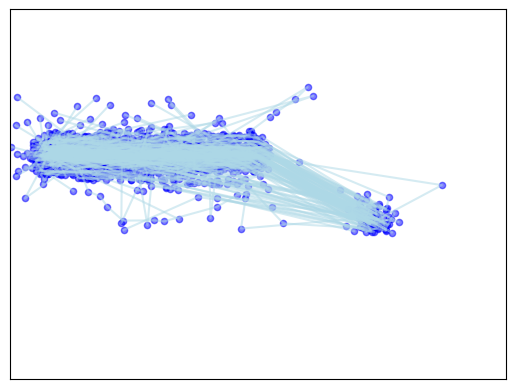

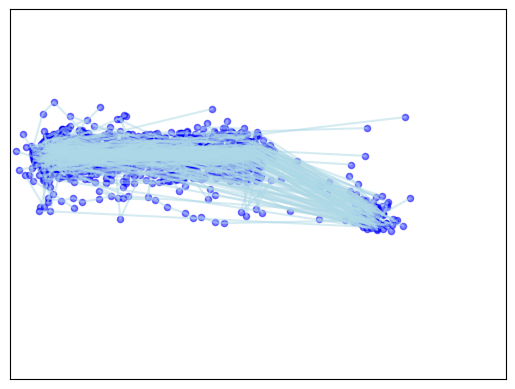

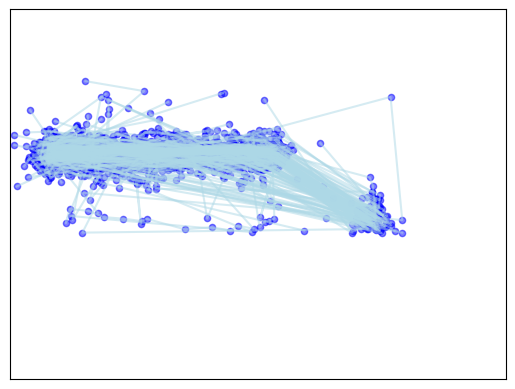

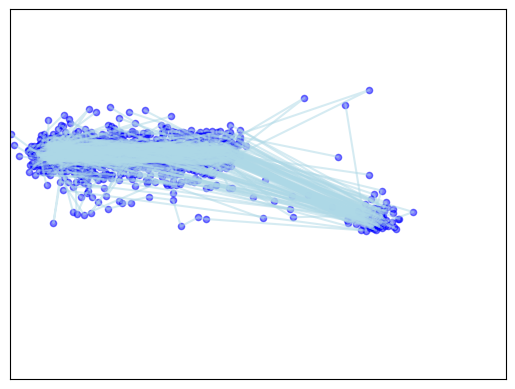

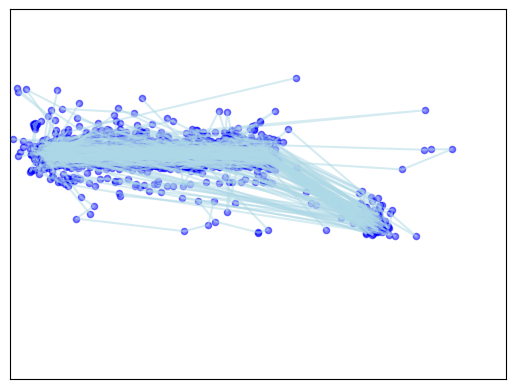

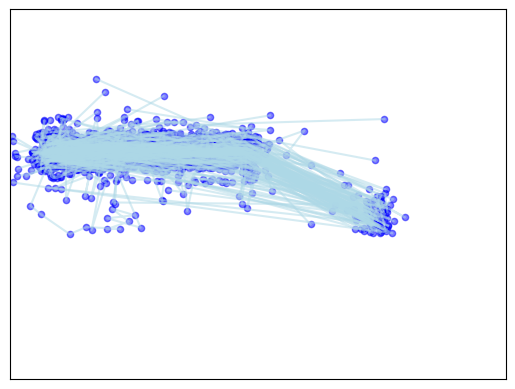

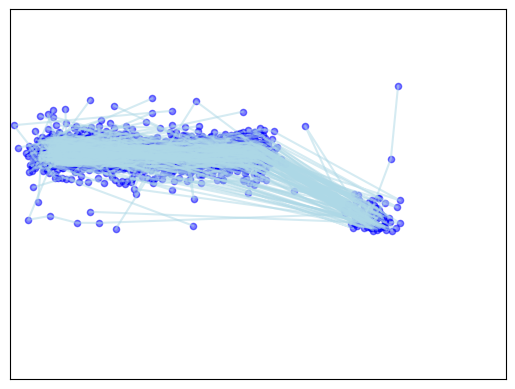

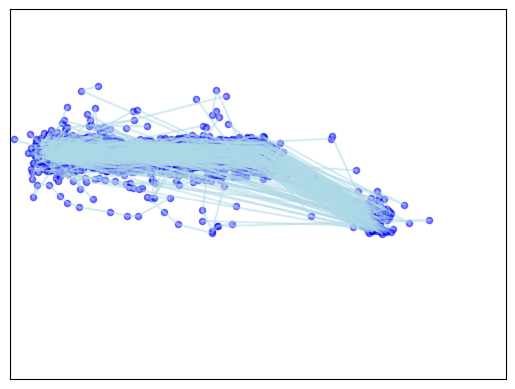

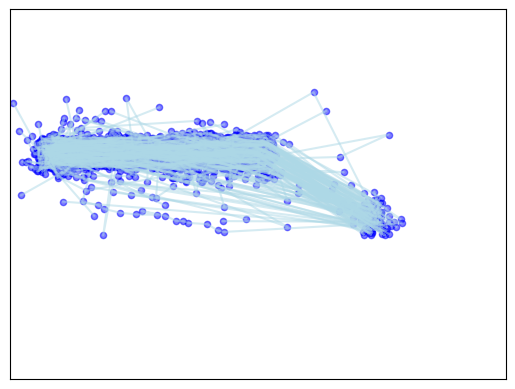

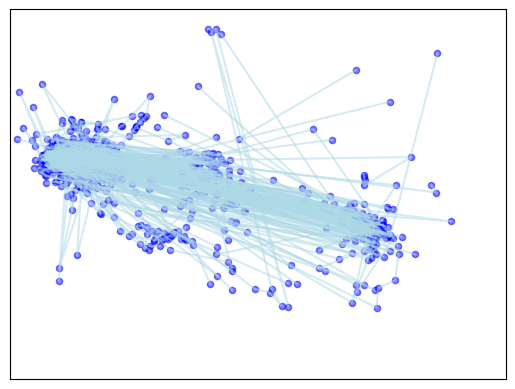

In [531]:
for i in range(1, 31):
    DyslexiaDat2.VisScanPath(i, visFix=True, scan_path_col='lightblue', allS=True)

In [532]:
tot_subj = DyslexiaDat2.subjects

In [533]:
WhichC, WhichCN = DyslexiaDat2.GetGroups('Group')

Conditions [0. 1.]


In [534]:
# amount of subjects of group 0
WhichC[WhichC == 0].shape[0]

60

In [535]:
# amount of subjects of group 1
WhichC[WhichC == 1].shape[0]

23

In [210]:
stim_map = {8881:30, 8882:31, 8883:32, 8884:33, 8885:34, 8886:35}

In [59]:
from copy import deepcopy
def train_HMM(self, test_participants, group, stimuli, n_components, starting_tests, covariance_type):
    models_g0 = []
    models_g1 = []
    for stim in stimuli:
        exclude_subj = []
        try:
            if stim >= 8881:
                exclude_subj = map_stim_subj[stim_map[stim]]
            else:
                exclude_subj = map_stim_subj[stim]
        except:
            pass
        if exclude_subj == []:
            exclude_subj = test_participants
        else:
            exclude_subj = np.concatenate((test_participants, np.array(exclude_subj)))
        with io.capture_output() as _:
            train_model = self.models_pipeline(stim, n_components, group=group, starting_tests=starting_tests, only_starting=True, only_bic=True, covariance_type=covariance_type, remove_subj=exclude_subj)
        models_g0.append(deepcopy(train_model[0][0][0]))
        models_g1.append(deepcopy(train_model[1][0][0]))
        
    return models_g0, models_g1

In [61]:
def evaluation(self, stimuli, models_g0, models_g1, test_participants, test_labels):
    accuracy = []
    conf_matrix = np.zeros((2, 2))
    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]
        vote_g0 = 0
        vote_g1 = 0
        for s_idx,stim in enumerate(stimuli):
            x = []
            try:
                if stim >= 8881:
                    x = map_stim_subj[stim_map[stim]]
                else:
                    x = map_stim_subj[stim]
            except:
                pass
            if not subj in x:
                X0, Y0, l0 = self.get_data(stim, subject=int(s))
                res_0 = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
                res_1 = models_g1[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0

                if res_0 < res_1:
                    vote_g0 += 1
                else:
                    vote_g1 += 1

        if vote_g0 == vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 == vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        elif vote_g0 > vote_g1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif vote_g0 > vote_g1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif vote_g0 < vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 < vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        
    return accuracy, conf_matrix

In [ ]:
import json

def convert_to_serializable(obj):
    """
    Convert numpy arrays and other non-serializable objects to lists or basic types
    that can be saved in JSON format.
    """
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, float):
        return float(obj)  # Convert potential numpy float to standard Python float
    elif hasattr(obj, 'tolist'):
        return obj.tolist()
    return str(obj)

def save_ghmm_details(models, stimuli, description, output_file='ghmm_models_details.json'):
    """
    Save Gaussian HMM model details to a JSON file.
    
    Parameters:
    - models: List of fitted Gaussian HMM models
    - stimuli: Corresponding list of stimulus names
    - output_file: Path to the output JSON file
    """
    # Create a list to store model details
    models_details = []

    # Add description
    models_details.append({'description': description})
    models_details.append({'num_stimuli': len(stimuli)})
    
    # Iterate through models and stimuli
    for model, stim in zip(models, stimuli):
        model_info = {
            'stimulus': stim,
            'start_probabilities': convert_to_serializable(model.startprob_),
            'transition_matrix': convert_to_serializable(model.transmat_),
            'means': convert_to_serializable(model.means_),
            'covariances': convert_to_serializable(model.covars_),
            'covariance_type': model.covariance_type,
            'init_params': model.init_params,
            'num_components': model.n_components
        }
        models_details.append(model_info)
    
    # Save to JSON file
    output_file = './hmm_models2/' + output_file
    # Ensure the directory exists
    with open(output_file, 'w') as f:
        json.dump(models_details, f, indent=4, default=convert_to_serializable)
    
    print(f"Model details saved to {output_file}")

## HMM stimuli selection

In this section we separate the stimuli in 5 groups:
- Only Real Words
- Only Pseudowords (1 subset from 1 to 10)
- Only Nonwords
- Only Pseudowords (2 subset from 21 to 30)
- Mixed (Psedowords and Nonwords together)

In [302]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [8881, 8882, 8883, 8884, 8885, 8886]
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 50, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.6666666666666666
Fold 3 accuracy: 1.0
Fold 4 accuracy: 1.0
Fold 5 accuracy: 0.8888888888888888
Average accuracy: 0.8666666666666668
Standard deviation: 0.12957670877434002
Total confusion matrix:
[[30.  1.]
 [ 5.  9.]]


In [304]:
save_ghmm_details(models_g0, [8881, 8882, 8883, 8884, 8885, 8886],  description='Models trained with practice data of Typical Reader and Isolated Spelling Deficit (5th Fold)', output_file='ghmm_models_g0_practice.json')

Model details saved to ./hmm_models2/ghmm_models_g0_practice.json


In [305]:
save_ghmm_details(models_g1, [8881, 8882, 8883, 8884, 8885, 8886],  description='Models trained with practice data of Combined Reading and Spelling Deficit and Isolated Reading Deficit (5th Fold)', output_file='ghmm_models_g1_practice.json')

Model details saved to ./hmm_models2/ghmm_models_g1_practice.json


#### Calculating and saving the HMM

In [536]:
stimuli = list(range(1,31)) # from 1 to 30
models_g0 = []
models_g1 = []
#Around 80 minutes per fold
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    g0, g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 50, 'tied') # better 100 insted of 50 starting tests, improves stability
    models_g0.append(g0)
    models_g1.append(g1)

In [540]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [1,2,3,4,5,6,7,8,9,10] # Only Pseudohomophones
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.5555555555555556
Fold 2 accuracy: 0.5555555555555556
Fold 3 accuracy: 0.5555555555555556
Fold 4 accuracy: 0.7777777777777778
Fold 5 accuracy: 0.4444444444444444
Average accuracy: 0.5777777777777778
Standard deviation: 0.10886621079036347
Total confusion matrix:
[[19.  3.]
 [16.  7.]]


In [541]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [11,12,13,14,15,16,17,18,19,20] # Only Nonwords
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 1.0
Fold 2 accuracy: 0.7777777777777778
Fold 3 accuracy: 0.8888888888888888
Fold 4 accuracy: 0.6666666666666666
Fold 5 accuracy: 1.0
Average accuracy: 0.8666666666666666
Standard deviation: 0.12957670877434002
Total confusion matrix:
[[30.  1.]
 [ 5.  9.]]


In [542]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [21,22,23,24,25,26,27,28,29,30] # Only Pseudohomophones 2
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.8888888888888888
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 0.6666666666666666
Fold 4 accuracy: 0.5555555555555556
Fold 5 accuracy: 0.8888888888888888
Average accuracy: 0.7777777777777778
Standard deviation: 0.14054567378526128
Total confusion matrix:
[[27.  2.]
 [ 8.  8.]]


In [543]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30] # Mixed
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 1.0
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 0.8888888888888888
Fold 4 accuracy: 0.6666666666666666
Fold 5 accuracy: 1.0
Average accuracy: 0.888888888888889
Standard deviation: 0.12171612389003693
Total confusion matrix:
[[31.  1.]
 [ 4.  9.]]


In [544]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [1,2,3,4,5,6,7,8,9,10,21,22,23,24,25,26,27,28,29,30] # Pseudohomophones + Pseudohomophones 2
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.8888888888888888
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 0.6666666666666666
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 0.6666666666666666
Average accuracy: 0.7999999999999999
Standard deviation: 0.10886621079036347
Total confusion matrix:
[[28.  2.]
 [ 7.  8.]]


In [545]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = list(range(1,31)) # All stimuli
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 1.0
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 1.0
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 0.7777777777777778
Average accuracy: 0.9111111111111111
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[32.  1.]
 [ 3.  9.]]


In [546]:
save_ghmm_details(models_g0[2], list(range(1,31)),  description='Models trained with data of Typical Reader and Isolated Spelling Deficit (3rd Fold)', output_file='ghmm_models_g0.json')

Model details saved to ./hmm_models2/ghmm_models_g0.json


In [547]:
save_ghmm_details(models_g1[2], list(range(1,31)),  description='Models trained with data of Combined Reading and Spelling Deficit and Isolated Reading Deficit (3rd Fold)', output_file='ghmm_models_g1.json')

Model details saved to ./hmm_models2/ghmm_models_g1.json


In [548]:
import pickle
def save_ghmm_models(models, stimuli, folds, output_file):
    """
    Save Gaussian HMM model using pickle.

    Parameters:
    - models: List of fitted Gaussian HMM models
    - output_file: Path to the output pickle file
    """
    for f in range(folds):
        for stim in stimuli:
            with open(f'./hmm_models2/{output_file}/{output_file}_fold_{f+1}_stim_{stim}.pkl', 'wb') as file:
                pickle.dump(models[f][stim-1], file)
    print(f"Model details saved to {output_file}")

In [549]:
save_ghmm_models(models_g0, list(range(1,31)), 5, output_file='models_g0')
save_ghmm_models(models_g1, list(range(1,31)), 5, output_file='models_g1')

Model details saved to models_g0
Model details saved to models_g1


In [556]:
# try to load the models
path = './hmm_models2/models_g0/models_g0_fold_1_stim_1.pkl' 
with open(path, 'rb') as file:
    model = pickle.load(file)
    print(model)
    print(model.startprob_)
    print(model.transmat_)
    print(model.means_)
    print(model.covars_)
    print(model.covariance_type)
    print(model.init_params)
    print(model.n_components)

GaussianHMM(covariance_type='tied', n_components=8)
[8.98991719e-11 8.98365081e-15 3.33333333e-02 5.23945435e-33
 2.03178903e-01 1.36023579e-09 7.63487756e-01 6.46586085e-09]
[[6.77435734e-01 2.40351630e-02 9.51786928e-03 2.83325153e-01
  3.75449651e-03 1.87753431e-08 3.95930596e-04 1.53563451e-03]
 [3.54842572e-01 6.44866336e-01 1.21040104e-05 1.04117255e-04
  6.26720753e-12 5.38794593e-14 1.68435167e-04 6.43543022e-06]
 [3.94000609e-11 1.57997937e-02 4.46763102e-01 4.54937728e-02
  2.09868698e-01 3.94067736e-03 2.11700277e-01 6.64336794e-02]
 [1.53432683e-07 7.20309166e-20 6.15035131e-11 8.10735156e-01
  9.17193993e-09 1.89264681e-01 5.87873973e-16 4.92104979e-14]
 [2.10198475e-02 1.40771128e-05 1.91850636e-04 7.33826341e-02
  1.80778885e-02 1.41966463e-05 8.31191514e-01 5.61079918e-02]
 [2.06866863e-09 8.98485579e-20 6.50559515e-17 3.32624791e-06
  1.78755589e-07 6.33011493e-01 4.74307460e-10 3.66984999e-01]
 [1.47010756e-05 1.19693231e-01 3.62491406e-35 8.70478988e-10
  1.83783042e

In [306]:
from PyEyeSim.visualhelper import draw_ellipse

def VisHMM(self,dat,hmmfitted,ax=0,showim=0,stim=1,lengths=0,incol=False):
    '''
     visualize fixations and fitted hidden markov model
    hmmfitted: fitted hidden markov model
    ax: if not provided, new figure opens 

    
     Positional arguments
     ----------
    dat : sequence of fixations
    hmmfitted : fitted hmmlearn hidden markov model object

    
     Optional arguments
     ----------
    ax:  provide axis handle for the plot, if not new figure is opened The default is 0.
    showim : show stimulus if True The default is 1.
    stim : stimulus name
    lengths : length of time series sequences (needed for multiple sequences)
    incol : If True, use sequence of colorsm differing for each component. The default is False.

    Returns
    -------
    None.

    '''
    
    colors=['k','gray','salmon','olive','m','c','g','y','navy','orange','darkred','r','darkgreen','k','gray','salmon','olive','y','m','g','c']
    if type(ax)==int:
       fig,ax= plt.subplots()
    if showim:
        ax.imshow(self.images[stim])
        alph=.8
    else:
        alph=.8
    if np.shape(dat)[0]>200:
        alph=.6

    preds=hmmfitted.predict(dat,lengths)

    ax.scatter(hmmfitted.means_[:,0],hmmfitted.means_[:,1],color='darkred',s=50)
    
    for c1 in range(hmmfitted.n_components):
        if incol:
            color1=colors[c1]  # color for scatter 
            color2=colors[c1] # color for patch

        else:
            color1='k'
            color2='olive'

        ax.scatter(dat[preds==c1,0],dat[preds==c1,1],color=color1,alpha=alph)
        #print(np.shape(hmmfitted.covars_[c1]))
       # draw_ellipse((hmmfitted.means_[c1,0],hmmfitted.means_[c1,1]),hmmfitted.covars_[c1],ax=ax,facecolor='none',edgecolor=color2,linewidth=2)
        draw_ellipse(hmmfitted.means_[c1,0],hmmfitted.means_[c1,1],hmmfitted.covars_[c1],ax=ax,facecolor='none',edgecolor=color2,linewidth=2)

        for c2 in range(hmmfitted.n_components):
            if c1!=c2:
                ax.plot([hmmfitted.means_[c1,0],hmmfitted.means_[c2,0]],[hmmfitted.means_[c1,1],hmmfitted.means_[c2,1]],linewidth=hmmfitted.transmat_[c1,c2]*5,color='r')
    ax.set_ylim([self.y_size,0])
    ax.set_xlim([0,self.x_size])
    ax.set_yticks([])
    ax.set_xticks([])

In [356]:

def VisScanPathMod(self, stimn, ax=None, alpha=0.5, allS=True, fixation_col='black', visFix=False, num_fixations=None,center=False):
    ''' 
    Description: Visualize scan path for a given stimulus.
    
    
     Positional arguments
     ----------
    stimn: stimulus index.
    
    Optional arguments
    ----------
    ax: if not provided, a new figure is created.
    alpha: Transparency level for scan path. Defaults to 0.5.
    allS:  Default=True, visualize scan paths for all participants; otherwise specify participant index.
    scan_path_col: Color for the scan path. Defaults to 'salmon'.
    fixation_col: Color for fixation points. Defaults to 'blue'.
    VisFix: Default=False. If True, Visualize fixations with scatter points.
    num_fixations: Number of fixations to visualize. If not provided all fixations will be enumerated.
    Returns:
    '''
    if ax is None:
        fig, ax = plt.subplots()
    if center:
        if hasattr(self,'images'):
            xs1=(self.x_size-np.shape(self.images[self.stimuli[stimn]])[1])/2
            xs2=self.x_size-xs1
            ys1=(self.y_size-np.shape(self.images[self.stimuli[stimn]])[0])/2
            ys2=self.y_size-ys1
            ax.imshow(self.images[self.stimuli[stimn]],extent=[xs1,xs2,ys2,ys1])
    else:
        if hasattr(self,'images'):
            ax.imshow(self.images[self.stimuli[stimn]])

    if type(allS) == bool:
        for cs in range(self.ns):
            fixx, fixy = self.GetFixationData(self.subjects[cs], self.stimuli[stimn])
            if cs < 117:
                scan_path_col = 'salmon'
            else:
                scan_path_col = 'blue'
            ax.plot(fixx, fixy, alpha=alpha, color=scan_path_col)
            if visFix:
                ax.scatter(fixx, fixy, color=fixation_col, alpha=alpha, s=20)

            # Enumerate all fixations by default
           # num_fixations = len(fixx) if num_fixations is None else num_fixations

            #for i, (x, y) in enumerate(zip(fixx[:num_fixations], fixy[:num_fixations])):
             #   ax.text(x, y, str(i + 1), color="white", fontsize=10, ha='center', va='center')

    else:
        fixx, fixy = self.GetFixationData(self.subjects[allS], self.stimuli[stimn])
        ax.plot(fixx, fixy, alpha=alpha, color=scan_path_col)
        if visFix:
            ax.scatter(fixx, fixy, color=fixation_col, alpha=alpha, s=20)

        # Enumerate all fixations by default
  #      num_fixations = len(fixx) if num_fixations is None else num_fixations

#        for i, (x, y) in enumerate(zip(fixx[:num_fixations], fixy[:num_fixations])):
 #           ax.text(x, y, str(i + 1), color="white", fontsize=10, ha='center', va='center')

    ax.set_xlim([0, self.x_size])
    ax.set_ylim([self.y_size, 0])
    ax.set_xticks([])
    ax.set_yticks([])

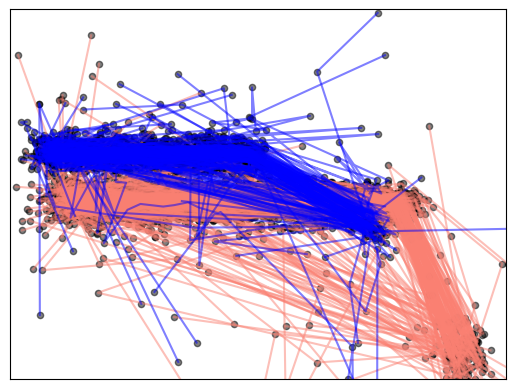

In [406]:
VisScanPathMod(DyslexiaDat, 1, visFix=True, allS=True)

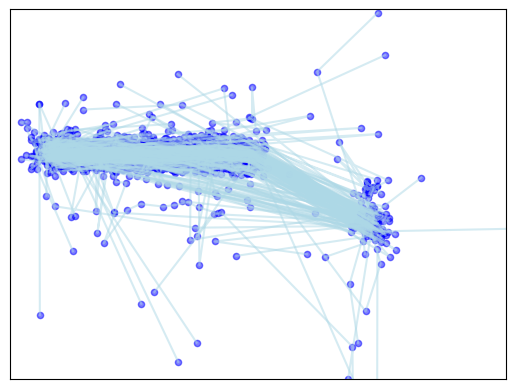

In [407]:
DyslexiaDat2.VisScanPath(1,visFix=True,scan_path_col='lightblue', allS=True)

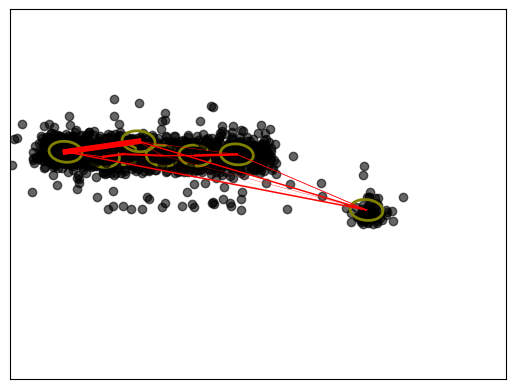

In [555]:
stim = 1
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(stim,group=0,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,models_g0[0][stim-1],ax=0,showim=0,stim=stim,lengths=lengths)

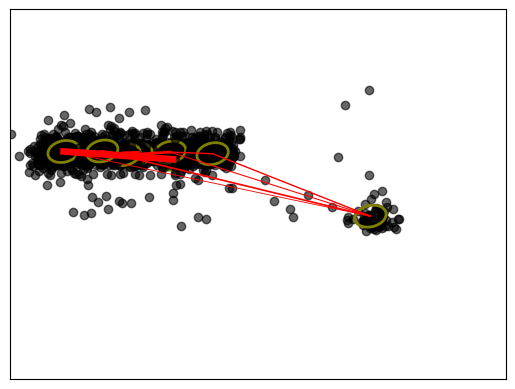

In [554]:
stim = 25
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(stim,group=0,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,models_g0[0][stim-1],ax=0,showim=0,stim=stim,lengths=lengths)

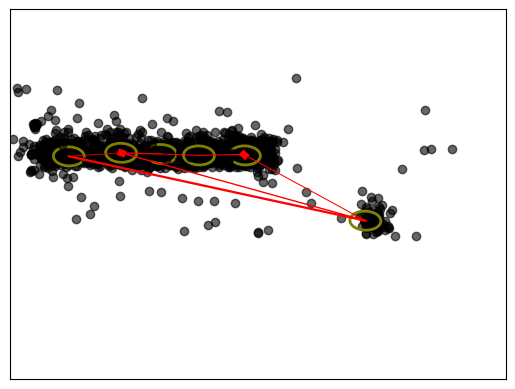

In [553]:
stim = 26
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(stim,group=0,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,models_g1[0][stim-1],ax=0,showim=0,stim=stim,lengths=lengths)

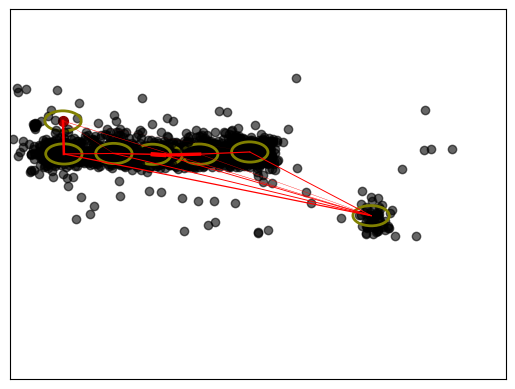

In [552]:
stim = 26
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(stim,group=0,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,models_g0[0][stim-1],ax=0,showim=0,stim=stim,lengths=lengths)

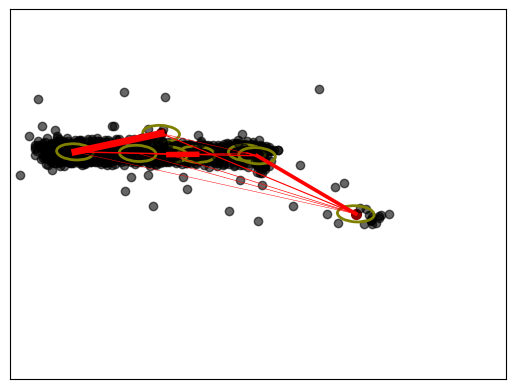

In [550]:
stim = 1
file = f'./hmm_models2/models_g1/models_g1_fold_1_stim_{stim}.pkl'
with open(file, 'rb') as f:
    model = pickle.load(f)
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(stim,group=1,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,model,ax=0,showim=0,stim=stim,lengths=lengths)